In [1]:
import pandas as pd
import numpy as np
import transformers
from datasets import load_dataset
from sklearn import metrics
import re
import matplotlib.pyplot as plt
from pathlib import Path

# TREC

In [2]:
dataset = load_dataset("trec")
Trainds=pd.DataFrame({'text':dataset['train']['text'],'coarse_label':dataset['train']['coarse_label'],'fine_label':dataset['train']['fine_label']}).reset_index(drop=True)
Filtered_train=Trainds[((Trainds['fine_label']==2)|(Trainds['fine_label']==3)|(Trainds['fine_label']==4)|(Trainds['fine_label']==5)|(Trainds['fine_label']==6)|(Trainds['fine_label']==7)|(Trainds['fine_label']==8)|(Trainds['fine_label']==9)|(Trainds['fine_label']==10)
           |(Trainds['fine_label']==11)|(Trainds['fine_label']==12)|(Trainds['fine_label']==14)|(Trainds['fine_label']==15)
           |(Trainds['fine_label']==16)|(Trainds['fine_label']==17)|(Trainds['fine_label']==18)|(Trainds['fine_label']==19)
           |(Trainds['fine_label']==20)|(Trainds['fine_label']==21)|(Trainds['fine_label']==22)|(Trainds['fine_label']==23))].reset_index(drop=True)

Found cached dataset trec (C:/Users/sepehrc/.cache/huggingface/datasets/trec/default/2.0.0/f2469cab1b5fceec7249fda55360dfdbd92a7a5b545e91ea0f78ad108ffac1c2)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
def EmbeddingModel(txt, tokenizer, nlp):
    idx = tokenizer.encode(txt)
    idx = np.array(idx)[None,:]  
    embedding = nlp(idx)
    res = np.array(embedding[0][0][1:-1])
    return res

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
Meanval = [EmbeddingModel(txt, tokenizer, nlp).mean(0) 
             for txt in Filtered_train['text']]
X = np.array(Meanval)

<AxesSubplot:xlabel='threshold'>

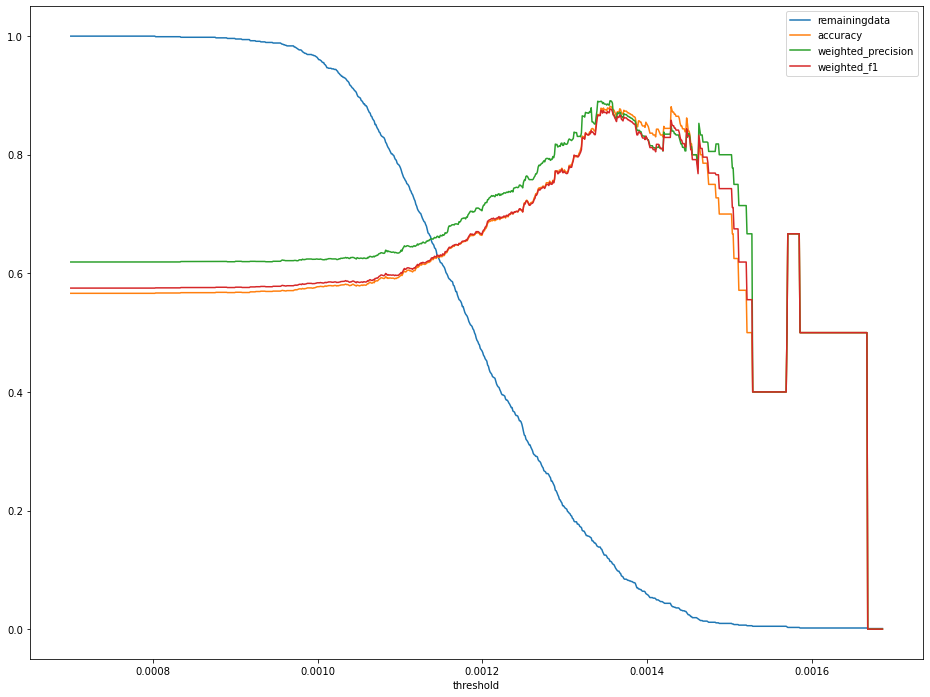

In [5]:
Keyword_vector = {}
Keyword_vector["animal"] =  ['animals','bird','species','insect','zoo','rabbit']
Keyword_vector["animal2"] = ['what', 'bird']
Keyword_vector["animal3"] = ['species','creature']
Keyword_vector["body"] = ['what', 'part', 'of', 'body']
Keyword_vector["body2"] = ['body','organ','eye','ear','leg','blood']
Keyword_vector["color"] = ['color','?']
Keyword_vector["color2"] = ['color','is','?']
Keyword_vector["color3"] = ['colors','are']
Keyword_vector["creative"] = ['magazine']
Keyword_vector["creative2"] = ['book','movie','art','feature','character']
Keyword_vector["creative3"] = ['invention','creative','piece']
Keyword_vector["money"] = ['currency','currencies','money']
Keyword_vector["disease"] = ['transmit','viral','virus']
Keyword_vector["disease2"] = ['diseases','disease','suffer']
Keyword_vector["disease3"] = ['medician','doctor','physician']
Keyword_vector["disease4"] = ['fear','fear','of']
Keyword_vector["event"] = ['event','calendar','year','day','week']
Keyword_vector["event2"] = ['traditionals','event']
Keyword_vector["event3"] = ['war','between','countries']
Keyword_vector["event4"] = ['most','historical','least','ever','last','first','event']
Keyword_vector["event5"] = ['event','happened','on','date']
Keyword_vector["food"] = ['food','meal','fruit','eat','edible']
Keyword_vector["food2"] = ['beer','cocktail','brew','rum','bars']
Keyword_vector["food3"] = ['coffee','caffeinated','tea']
Keyword_vector["food4"] = ['edible','foods','drinks']
Keyword_vector["food5"] = ['wine','alcohol']
Keyword_vector["food6"] = ['breakfast','lunch','dinner']
Keyword_vector["instrument"] = ['playing','musical','instument','genre']
Keyword_vector["instrument2"] = ['musician','band','played']
Keyword_vector["language"] = ['a','languages','spoken','by']
Keyword_vector["language2"] = ['linguistics','language']
Keyword_vector["language3"] = ['language family','spoken']
Keyword_vector["letter"] = ['language','letters','alphabetical','vowels','consonant']
Keyword_vector["plant"] = ['planted','cultivated','green','natural']
Keyword_vector["plant2"] = ['flower','flora','green']
Keyword_vector["product"] = ['products','brand','computer','chemical']
Keyword_vector["product2"] = ['produced','manufactured']
Keyword_vector["religion"] = ['religions','religion','islam','christianity','judaism','believers','religious']
Keyword_vector["sport"] = ['sports','board game','card game']
Keyword_vector["sport2"] = ['football','chess','swimming','badminton','exercise','baseball']
Keyword_vector["sport3"] = ['sport','sport']
Keyword_vector["sport4"] = ['sports','international','activity','tournament','olympics','player','team','race','match']
Keyword_vector["element"] = ['made', 'out', 'of','consist of']
Keyword_vector["element2"] = ['component','element','ingredients','material','composition']
Keyword_vector["element3"]=['chemistry','earth','made out of']
Keyword_vector["symbol"]=['symbol','characterizing']
Keyword_vector["symbol2"]=['sign','symbol','mark']
Keyword_vector["method"]=['methods','techniques','measures','approaches','way']
Keyword_vector["method2"]=['method','measure','approache','way']
Keyword_vector["equivalent"]=['equivalent','equivalent','term','other name']
Keyword_vector["equivalent2"]=['better known as','alias']
Keyword_vector["vehicle"]=['vehicle','airplane','ships','submarine','spacecraft','motorcycle','space shuttle','bicycle']
Keyword_vector["vehicle2"]=['vehicle','submarine','ships']
Keyword_vector["vehicle3"]=['vehicle','spacecraft','airplane','space shuttle']
Keyword_vector["vehicle4"]=['vehicle','motorcycle']
Keyword_vector["vehicle5"]=['vehicle','bicycle']
Keyword_vector["word"]=['language','letters','words','plural','singular','counts']

dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(X, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)

labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])
    
empty=[]
results=pd.DataFrame()
vals=np.linspace(0.0007, 0.00169, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Filtered_train['tag']=tags
    Filtered_train=Filtered_train.replace({'tag' : { 0 : 2, 1 : 2, 2 : 2, 3 : 3, 4 : 3, 5 : 4, 6 : 4, 7 : 4,8 : 5, 9 : 5, 10 : 5, 11 : 6, 12 : 7, 13 : 7, 14 : 7, 15 : 7
                               , 16 : 8, 17 : 8, 18 : 8, 19 : 8, 20 : 8, 21 : 9, 22 : 9, 23 : 9, 24 : 9, 25 : 9
                               , 26 : 9, 27 : 10, 28 : 10, 29 : 11, 30 : 11, 31 : 11, 32 : 12, 33 : 14, 34 : 14
                               , 35 : 15, 36 : 15, 37 : 16, 38: 17, 39: 17, 40: 17, 41: 17, 42: 18
                               , 43: 18, 44: 18, 45: 19, 46: 19, 47: 20, 48: 20, 49: 21, 50: 21, 51: 22
                               , 52: 22, 53: 22, 54: 22, 55: 22, 56: 23}})
    Filtered_train2=Filtered_train[Filtered_train['tag']!=999999].reset_index(drop=True)
    if (len(Filtered_train2['fine_label'])>0 and len(Filtered_train2['tag'])>0):
        
        results.loc[trshld,'weighted_f1']=float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-2].split('     ')[0].split('    ')[1].split('   ')[2])
        results.loc[trshld,'weighted_recall']=float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-2].split('     ')[0].split('    ')[1].split('   ')[1])
        results.loc[trshld,'weighted_precision']=float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-2].split('     ')[0].split('    ')[1].split('   ')[0])
        results.loc[trshld,'accuracy']=float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-4].split('     ')[4])
        results.loc[trshld,'supportaccur']=int(float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-4].split('     ')[5]))
        results.loc[trshld,'supportmacro']=int(float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-3].split('     ')[1]))
        results.loc[trshld,'supportweighted']=int(float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-2].split('     ')[1]))
        results.loc[trshld,'macro_precision']=float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-3].split('     ')[0].split('    ')[1].split('   ')[0])
        results.loc[trshld,'macro_recall']=float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-3].split('     ')[0].split('    ')[1].split('   ')[1])
        results.loc[trshld,'macro_f1']=float(metrics.classification_report(Filtered_train2['fine_label'], Filtered_train2['tag'], digits=5, zero_division=0).split('\n')[-3].split('     ')[0].split('    ')[1].split('   ')[2])
        results.loc[trshld,'length']=len(Filtered_train2)
        results.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Filtered_train2)])

results['remainingdata']=results['length']/(results['length'].max())
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))


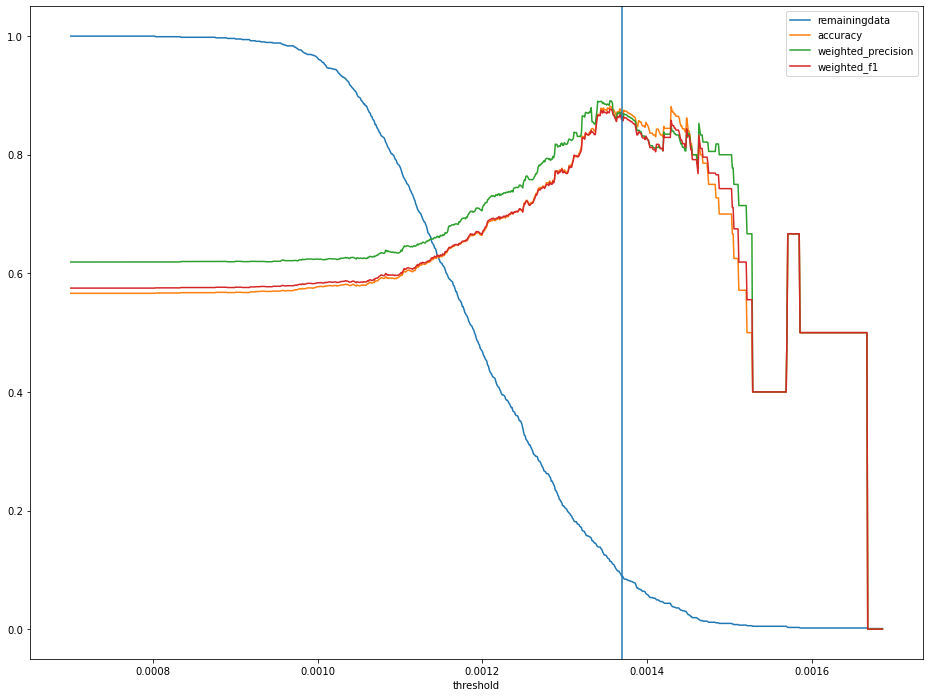

In [6]:
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))
plt.axvline(0.00137)

In [7]:
referirv=[]
for i in range(len(alltopics)):
    referirv.append(similarities[i].mean())

In [8]:
Testds=pd.DataFrame({'text':dataset['test']['text'],'coarse_label':dataset['test']['coarse_label'],'fine_label':dataset['test']['fine_label']}).reset_index(drop=True)
Filtered_test=Testds[((Testds['fine_label']==2)|(Testds['fine_label']==3)|(Testds['fine_label']==4)|(Testds['fine_label']==5)|(Testds['fine_label']==6)|(Testds['fine_label']==7)|(Testds['fine_label']==8)|(Testds['fine_label']==9)|(Testds['fine_label']==10)
           |(Testds['fine_label']==11)|(Testds['fine_label']==12)|(Testds['fine_label']==14)|(Testds['fine_label']==15)
           |(Testds['fine_label']==16)|(Testds['fine_label']==17)|(Testds['fine_label']==18)|(Testds['fine_label']==19)
           |(Testds['fine_label']==20)|(Testds['fine_label']==21)|(Testds['fine_label']==22)|(Testds['fine_label']==23))].reset_index(drop=True)

In [9]:
Meanval = [EmbeddingModel(txt, tokenizer, nlp).mean(0) 
                 for txt in Filtered_test['text']]
X = np.array(Meanval)

<AxesSubplot:xlabel='threshold'>

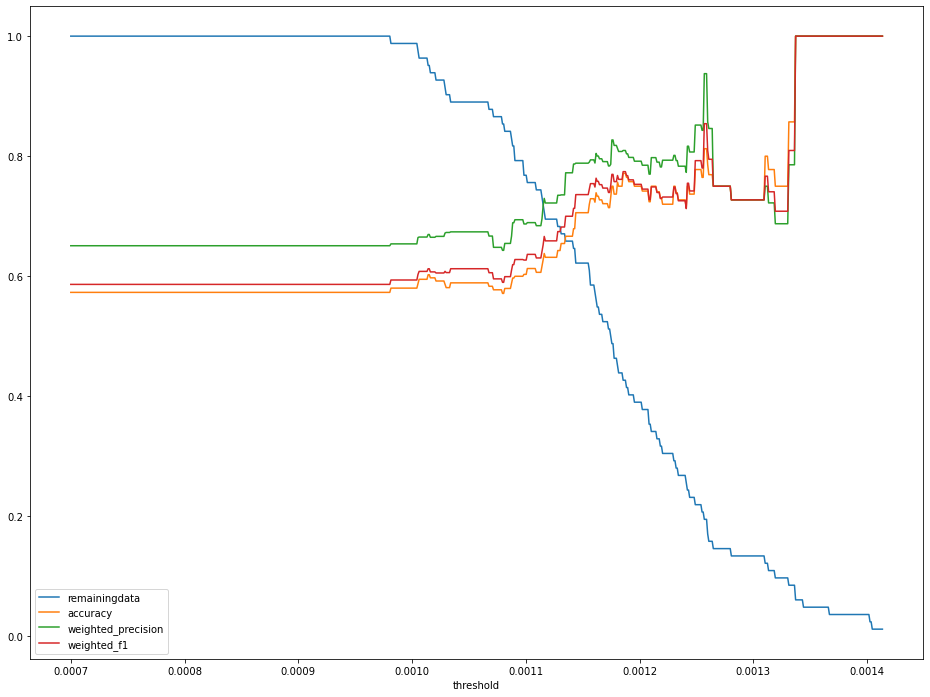

In [10]:
Keyword_vector = {}
Keyword_vector["animal"] =  ['animals','bird','species','insect','zoo','rabbit']
Keyword_vector["animal2"] = ['what', 'bird']
Keyword_vector["animal3"] = ['species','creature']
Keyword_vector["body"] = ['what', 'part', 'of', 'body']
Keyword_vector["body2"] = ['body','organ','eye','ear','leg','blood']
Keyword_vector["color"] = ['color','?']
Keyword_vector["color2"] = ['color','is','?']
Keyword_vector["color3"] = ['colors','are']
Keyword_vector["creative"] = ['magazine']
Keyword_vector["creative2"] = ['book','movie','art','feature','character']
Keyword_vector["creative3"] = ['invention','creative','piece']
Keyword_vector["money"] = ['currency','currencies','money']
Keyword_vector["disease"] = ['transmit','viral','virus']
Keyword_vector["disease2"] = ['diseases','disease','suffer']
Keyword_vector["disease3"] = ['medician','doctor','physician']
Keyword_vector["disease4"] = ['fear','fear','of']
Keyword_vector["event"] = ['event','calendar','year','day','week']
Keyword_vector["event2"] = ['traditionals','event']
Keyword_vector["event3"] = ['war','between','countries']
Keyword_vector["event4"] = ['most','historical','least','ever','last','first','event']
Keyword_vector["event5"] = ['event','happened','on','date']
Keyword_vector["food"] = ['food','meal','fruit','eat','edible']
Keyword_vector["food2"] = ['beer','cocktail','brew','rum','bars']
Keyword_vector["food3"] = ['coffee','caffeinated','tea']
Keyword_vector["food4"] = ['edible','foods','drinks']
Keyword_vector["food5"] = ['wine','alcohol']
Keyword_vector["food6"] = ['breakfast','lunch','dinner']
Keyword_vector["instrument"] = ['playing','musical','instument','genre']
Keyword_vector["instrument2"] = ['musician','band','played']
Keyword_vector["language"] = ['a','languages','spoken','by']
Keyword_vector["language2"] = ['linguistics','language']
Keyword_vector["language3"] = ['language family','spoken']
Keyword_vector["letter"] = ['language','letters','alphabetical','vowels','consonant']
Keyword_vector["plant"] = ['planted','cultivated','green','natural']
Keyword_vector["plant2"] = ['flower','flora','green']
Keyword_vector["product"] = ['products','brand','computer','chemical']
Keyword_vector["product2"] = ['produced','manufactured']
Keyword_vector["religion"] = ['religions','religion','islam','christianity','judaism','believers','religious']
Keyword_vector["sport"] = ['sports','board game','card game']
Keyword_vector["sport2"] = ['football','chess','swimming','badminton','exercise','baseball']
Keyword_vector["sport3"] = ['sport','sport']
Keyword_vector["sport4"] = ['sports','international','activity','tournament','olympics','player','team','race','match']
Keyword_vector["element"] = ['made', 'out', 'of','consist of']
Keyword_vector["element2"] = ['component','element','ingredients','material','composition']
Keyword_vector["element3"]=['chemistry','earth','made out of']
Keyword_vector["symbol"]=['symbol','characterizing']
Keyword_vector["symbol2"]=['sign','symbol','mark']
Keyword_vector["method"]=['methods','techniques','measures','approaches','way']
Keyword_vector["method2"]=['method','measure','approache','way']
Keyword_vector["equivalent"]=['equivalent','equivalent','term','other name']
Keyword_vector["equivalent2"]=['better known as','alias']
Keyword_vector["vehicle"]=['vehicle','airplane','ships','submarine','spacecraft','motorcycle','space shuttle','bicycle']
Keyword_vector["vehicle2"]=['vehicle','submarine','ships']
Keyword_vector["vehicle3"]=['vehicle','spacecraft','airplane','space shuttle']
Keyword_vector["vehicle4"]=['vehicle','motorcycle']
Keyword_vector["vehicle5"]=['vehicle','bicycle']
Keyword_vector["word"]=['language','letters','words','plural','singular','counts']

dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(X, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)



meanss=[]
labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])
    meanss.append(similarities[i].mean())
zarayeb = [ii / jj for ii, jj in zip(referirv, meanss)]
for i in range(len(similarities)):

    similarities[i] = (similarities[i])*zarayeb[i]
    
empty=[]
resultstestds=pd.DataFrame()
vals=np.linspace(0.0007, 0.00169, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Filtered_test['tag']=tags
    Filtered_test=Filtered_test.replace({'tag' : { 0 : 2, 1 : 2, 2 : 2, 3 : 3, 4 : 3, 5 : 4, 6 : 4, 7 : 4,8 : 5, 9 : 5, 10 : 5, 11 : 6, 12 : 7, 13 : 7, 14 : 7, 15 : 7
                               , 16 : 8, 17 : 8, 18 : 8, 19 : 8, 20 : 8, 21 : 9, 22 : 9, 23 : 9, 24 : 9, 25 : 9
                               , 26 : 9, 27 : 10, 28 : 10, 29 : 11, 30 : 11, 31 : 11, 32 : 12, 33 : 14, 34 : 14
                               , 35 : 15, 36 : 15, 37 : 16, 38: 17, 39: 17, 40: 17, 41: 17, 42: 18
                               , 43: 18, 44: 18, 45: 19, 46: 19, 47: 20, 48: 20, 49: 21, 50: 21, 51: 22
                               , 52: 22, 53: 22, 54: 22, 55: 22, 56: 23}})
    Filtered_test2=Filtered_test[Filtered_test['tag']!=999999].reset_index(drop=True)
    if (len(Filtered_test2['fine_label'])>0 and len(Filtered_test2['tag'])>0):
        
        resultstestds.loc[trshld,'weighted_f1']=float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-2].split('     ')[0].split('    ')[1].split('   ')[2])
        resultstestds.loc[trshld,'weighted_recall']=float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-2].split('     ')[0].split('    ')[1].split('   ')[1])
        resultstestds.loc[trshld,'weighted_precision']=float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-2].split('     ')[0].split('    ')[1].split('   ')[0])
        resultstestds.loc[trshld,'accuracy']=float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-4].split('     ')[4])
        resultstestds.loc[trshld,'supportaccur']=int(float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-4].split('     ')[5]))
        resultstestds.loc[trshld,'supportmacro']=int(float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-3].split('     ')[1]))
        resultstestds.loc[trshld,'supportweighted']=int(float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-2].split('     ')[1]))
        resultstestds.loc[trshld,'macro_precision']=float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-3].split('     ')[0].split('    ')[1].split('   ')[0])
        resultstestds.loc[trshld,'macro_recall']=float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-3].split('     ')[0].split('    ')[1].split('   ')[1])
        resultstestds.loc[trshld,'macro_f1']=float(metrics.classification_report(Filtered_test2['fine_label'], Filtered_test2['tag'], digits=5, zero_division=0).split('\n')[-3].split('     ')[0].split('    ')[1].split('   ')[2])
        resultstestds.loc[trshld,'length']=len(Filtered_test2)
        resultstestds.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Filtered_test2)])

resultstestds['remainingdata']=resultstestds['length']/resultstestds['length'].max()
resultstestds.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))


# TweetEval

In [11]:
tweet_eval_stance_abortion = load_dataset('tweet_eval','stance_abortion')
tweet_eval_stance_atheism = load_dataset('tweet_eval', 'stance_atheism')
tweet_eval_stance_climate = load_dataset('tweet_eval','stance_climate')
tweet_eval_stance_feminist = load_dataset('tweet_eval', 'stance_feminist')
tweet_eval_stance_hillary = load_dataset('tweet_eval', 'stance_hillary')
train=[]
for k,j in zip([tweet_eval_stance_abortion,tweet_eval_stance_atheism,tweet_eval_stance_climate,tweet_eval_stance_feminist,tweet_eval_stance_hillary],['abort','ateism','clima','femin','hillary']):
    for i in k['train']:
        train.append([i,j])
        
Trainds=pd.DataFrame(train).reset_index(drop=True)
concatenated=pd.concat([Trainds[0].apply(pd.Series),Trainds[1]],axis=1)
concatenated.rename(columns={1: 'source'}, inplace=True)
concatenated['binlabel']=concatenated['label']
concatenated.replace({'binlabel' : {2:1}},inplace=True)
concatenated['multilabel']=concatenated['binlabel']
sour=['abort','ateism','clima','femin','hillary']
for i in range(len(sour)):
    concatenated['multilabel']=np.where(((concatenated['source']==sour[i])&(concatenated['binlabel']==1)), i+5,concatenated['multilabel'])
    
concatenated['multilabel2']=concatenated['label']
sour=['abort','ateism','clima','femin','hillary']
for i in range(len(sour)):
    concatenated['multilabel2']=np.where(((concatenated['source']==sour[i])&(concatenated['label']==1)), (i*10)+51,concatenated['multilabel2'])
    concatenated['multilabel2']=np.where(((concatenated['source']==sour[i])&(concatenated['label']==2)), (i*10)+52,concatenated['multilabel2'])
    
Filtered_train=concatenated[((concatenated['source']=='abort')|(concatenated['source']=='ateism')|(concatenated['source']=='clima')|(concatenated['source']=='femin')|(concatenated['source']=='hillary'))].reset_index(drop=True)
Filtered_trainz=concatenated[((concatenated['source']=='abort')|(concatenated['source']=='ateism')|(concatenated['source']=='clima')|(concatenated['source']=='femin')|(concatenated['source']=='hillary'))].reset_index(drop=True)
Filtered_trainz=Filtered_trainz[Filtered_trainz['multilabel']!=0].reset_index(drop=True)

Found cached dataset tweet_eval (C:/Users/sepehrc/.cache/huggingface/datasets/tweet_eval/stance_abortion/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset tweet_eval (C:/Users/sepehrc/.cache/huggingface/datasets/tweet_eval/stance_atheism/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset tweet_eval (C:/Users/sepehrc/.cache/huggingface/datasets/tweet_eval/stance_climate/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset tweet_eval (C:/Users/sepehrc/.cache/huggingface/datasets/tweet_eval/stance_feminist/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset tweet_eval (C:/Users/sepehrc/.cache/huggingface/datasets/tweet_eval/stance_hillary/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
Meanval = [EmbeddingModel(txt, tokenizer, nlp).mean(0) 
                 for txt in Filtered_trainz['text']]
X = np.array(Meanval)

<AxesSubplot:xlabel='threshold'>

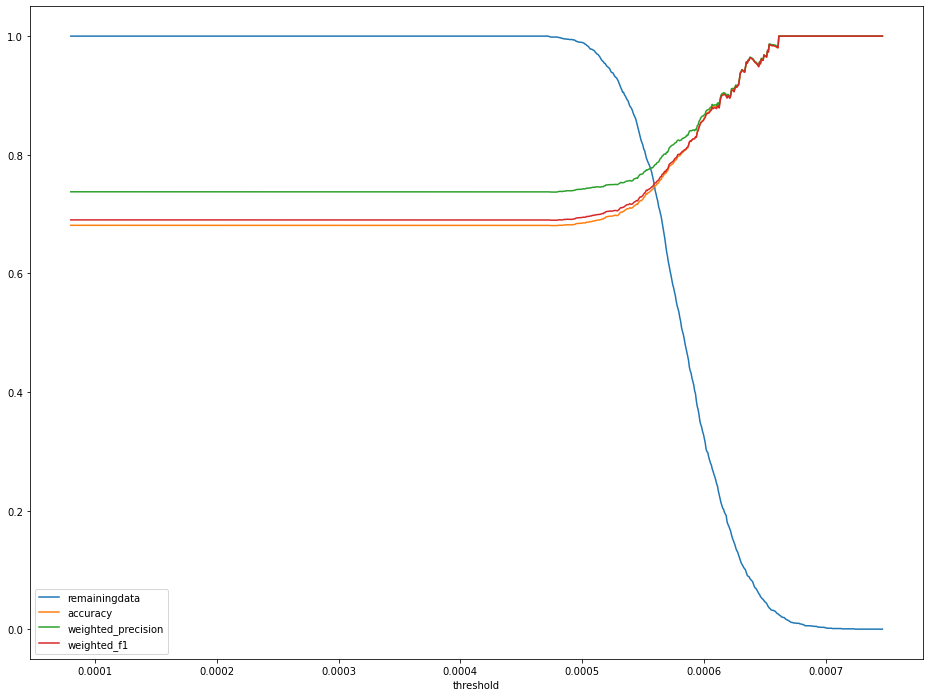

In [13]:
Keyword_vector = {}
Keyword_vector["abort"] =  ['abortion','life','family','churches','birth']
Keyword_vector["abort2"] =  ['abortion','prayers','kill','unborn','pregnant','murder','danger']
Keyword_vector["abort3"] =  ['abortion','choice','woman','pregnant','health','body']
Keyword_vector["abort4"] =  ['abortion','fetus','women','fertility','pregnant','rights','mother']
Keyword_vector["atheism"] =  ['faith','religion','crucified','christ','jesus','holy','bilbe']
Keyword_vector["atheism2"] =  ['almighty','god','prayer','hallelujah','believers','belief','amen','bless']
Keyword_vector["atheism3"] =  ['freedom','god','religion','fiction','stories','religions','claim','delusion','morality','slavery','harm','ism']
Keyword_vector["atheism4"] =  ['god','religion','mortal','evidence','stories','religions','claim','science']
Keyword_vector["climate"] =  ['climate change','global warming','hoax','lie','wrong']
Keyword_vector["climate2"] =  ['climate','change','global','warming','emergency','deny','green','co2']
Keyword_vector["climate3"] =  ['climate','change','carbon','coal','winter','summer','earth','natural disasters','planet','degrees']
Keyword_vector["climate4"] =  ['water','flooding','drought','warming','environmental','weather','hot','rising']
Keyword_vector["climate5"] =  ['greenhouse gasses', 'agriculture','combat',' climate','emissions','raining','glacier','atmosphere']
Keyword_vector["femin"] =  ['feminists','fucking','feminism','stupid','porn','men','women','sexist','hate','bitch']
Keyword_vector["femin2"] =  ['rape','misogynist','sexual','equality','paid','women','gender','respect']
Keyword_vector["hillary"] =  ['white house','president','potus','united states','usa','hillary','clinton','emails','Benghazi','dems','democrats','republicans','gop','socialist','communist','america','obama']
Keyword_vector["hillar2y"] =  ['hillary','clinton','support','candidate','volunteer','election','campaign']




dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(X, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)

labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])
    
    
empty=[]
results=pd.DataFrame()
vals=np.linspace(0.00008, 0.0008, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Filtered_trainz['tag']=tags
    Filtered_trainz=Filtered_trainz.replace({'tag' : { 0 : 5, 1 : 5, 2 : 5, 3 : 5, 4 : 6, 5 : 6, 6:6, 7:6,8:7,9:7
                                    ,10:7 ,11:7 , 12:7 , 13 : 8 , 14:8, 15:9, 16:9}})
    Filtered_trainz2=Filtered_trainz[Filtered_trainz['tag']!=999999].reset_index(drop=True)
    if (len(Filtered_trainz2['multilabel'])>0 and len(Filtered_trainz2['tag'])>0):
        report=metrics.classification_report(Filtered_trainz2['multilabel'], Filtered_trainz2['tag'], digits=6, zero_division=0).split('\n')
        results.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        results.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        results.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        results.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        results.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        results.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        results.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        results.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        results.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        results.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        results.loc[trshld,'length']=len(Filtered_trainz2)
        results.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Filtered_trainz2)])

results['remainingdata']=results['length']/(results['length'].max())
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))
    
    


In [14]:
referirv=[]
for i in range(len(alltopics)):
    referirv.append(similarities[i].mean())
test=[]
for k,j in zip([tweet_eval_stance_abortion,tweet_eval_stance_atheism,tweet_eval_stance_climate,tweet_eval_stance_feminist,tweet_eval_stance_hillary],['abort','ateism','clima','femin','hillary']):
    for i in k['test']:
        test.append([i,j])
        
Testds=pd.DataFrame(test).reset_index(drop=True)
concatenated=pd.concat([Testds[0].apply(pd.Series),Testds[1]],axis=1)
concatenated.rename(columns={1: 'source'}, inplace=True)
concatenated['binlabel']=concatenated['label']
concatenated.replace({'binlabel' : {2:1}},inplace=True)
concatenated['multilabel']=concatenated['binlabel']
sour=['abort','ateism','clima','femin','hillary']
for i in range(len(sour)):
    concatenated['multilabel']=np.where(((concatenated['source']==sour[i])&(concatenated['binlabel']==1)), i+5,concatenated['multilabel'])
concatenated['multilabel2']=concatenated['label']
sour=['abort','ateism','clima','femin','hillary']
for i in range(len(sour)):
    concatenated['multilabel2']=np.where(((concatenated['source']==sour[i])&(concatenated['label']==1)), (i*10)+51,concatenated['multilabel2'])
    concatenated['multilabel2']=np.where(((concatenated['source']==sour[i])&(concatenated['label']==2)), (i*10)+52,concatenated['multilabel2'])

Filtered_testz=concatenated[((concatenated['source']=='abort')|(concatenated['source']=='ateism')|(concatenated['source']=='clima')|(concatenated['source']=='femin')|(concatenated['source']=='hillary'))].reset_index(drop=True)
Filtered_testz=Filtered_testz[Filtered_testz['multilabel']!=0].reset_index(drop=True)


Meanval = [EmbeddingModel(txt, tokenizer, nlp).mean(0) 
                 for txt in Filtered_testz['text']]
X = np.array(Meanval)

<AxesSubplot:xlabel='threshold'>

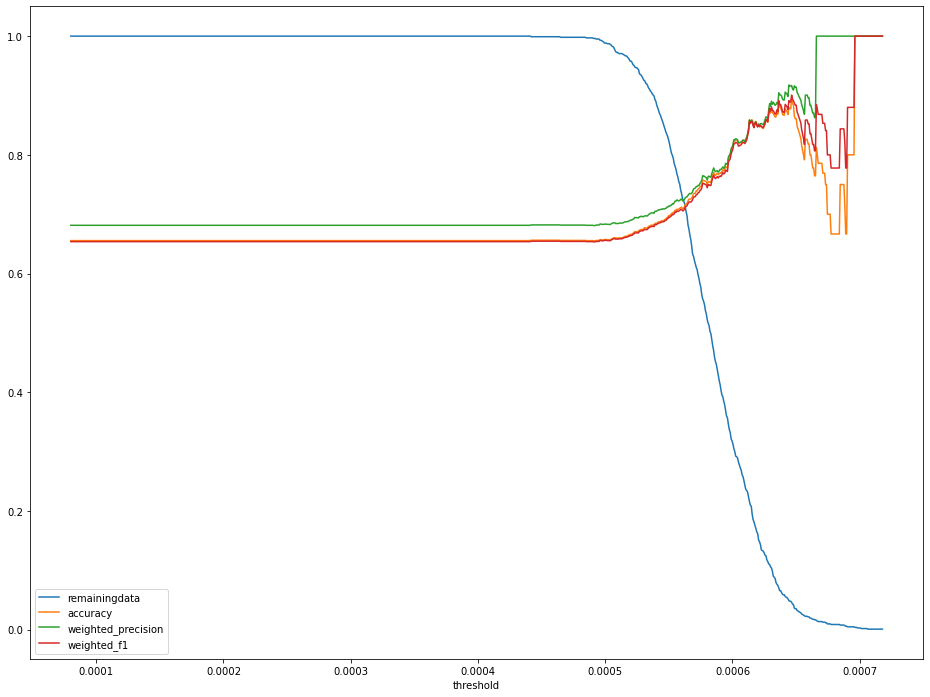

In [15]:
Keyword_vector = {}
Keyword_vector["abort"] =  ['abortion','life','family','churches','birth']
Keyword_vector["abort2"] =  ['abortion','prayers','kill','unborn','pregnant','murder','danger']
Keyword_vector["abort3"] =  ['abortion','choice','woman','pregnant','health','body']
Keyword_vector["abort4"] =  ['abortion','fetus','women','fertility','pregnant','rights','mother']
Keyword_vector["atheism"] =  ['faith','religion','crucified','christ','jesus','holy','bilbe']
Keyword_vector["atheism2"] =  ['almighty','god','prayer','hallelujah','believers','belief','amen','bless']
Keyword_vector["atheism3"] =  ['freedom','god','religion','fiction','stories','religions','claim','delusion','morality','slavery','harm','ism']
Keyword_vector["atheism4"] =  ['god','religion','mortal','evidence','stories','religions','claim','science']
Keyword_vector["climate"] =  ['climate change','global warming','hoax','lie','wrong']
Keyword_vector["climate2"] =  ['climate','change','global','warming','emergency','deny','green','co2']
Keyword_vector["climate3"] =  ['climate','change','carbon','coal','winter','summer','earth','natural disasters','planet','degrees']
Keyword_vector["climate4"] =  ['water','flooding','drought','warming','environmental','weather','hot','rising']
Keyword_vector["climate5"] =  ['greenhouse gasses', 'agriculture','combat',' climate','emissions','raining','glacier','atmosphere']
Keyword_vector["femin"] =  ['feminists','fucking','feminism','stupid','porn','men','women','sexist','hate','bitch']
Keyword_vector["femin2"] =  ['rape','misogynist','sexual','equality','paid','women','gender','respect']
Keyword_vector["hillary"] =  ['white house','president','potus','united states','usa','hillary','clinton','emails','Benghazi','dems','democrats','republicans','gop','socialist','communist','america','obama']
Keyword_vector["hillar2y"] =  ['hillary','clinton','support','candidate','volunteer','election','campaign']




dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(X, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)


meanss=[]
labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])
    meanss.append(similarities[i].mean())
zarayeb = [ii / jj for ii, jj in zip(referirv, meanss)]
for i in range(len(similarities)):

    similarities[i] = (similarities[i])*zarayeb[i]


    
    
empty=[]
resultstestds=pd.DataFrame()
vals=np.linspace(0.00008, 0.0008, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Filtered_testz['tag']=tags
    Filtered_testz=Filtered_testz.replace({'tag' : { 0 : 5, 1 : 5, 2 : 5, 3 : 5, 4 : 6, 5 : 6, 6:6, 7:6,8:7,9:7
                                    ,10:7 ,11:7 , 12:7 , 13 : 8 , 14:8, 15:9, 16:9}})
    Filtered_testz2=Filtered_testz[Filtered_testz['tag']!=999999].reset_index(drop=True)
    if (len(Filtered_testz2['multilabel'])>0 and len(Filtered_testz2['tag'])>0):
        report=metrics.classification_report(Filtered_testz2['multilabel'], Filtered_testz2['tag'], digits=6, zero_division=0).split('\n')
        resultstestds.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        resultstestds.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        resultstestds.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        resultstestds.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        resultstestds.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        resultstestds.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        resultstestds.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        resultstestds.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        resultstestds.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        resultstestds.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        resultstestds.loc[trshld,'length']=len(Filtered_testz2)
        resultstestds.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Filtered_testz2)])

resultstestds['remainingdata']=resultstestds['length']/(resultstestds['length'].max())
resultstestds.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))
    
    


# DBPedia_Classes

In [16]:
dataset_DBPedia = load_dataset("DeveloperOats/DBPedia_Classes")
Trainds=pd.DataFrame({'text':dataset_DBPedia['train']['text'],'l1':dataset_DBPedia['train']['l1'],'l2':dataset_DBPedia['train']['l2'],'l3':dataset_DBPedia['train']['l3']}).reset_index(drop=True)
Length_filtered_train=Trainds[Trainds['text'].str.len()<=1000].reset_index(drop=True)

Found cached dataset csv (C:/Users/sepehrc/.cache/huggingface/datasets/DeveloperOats___csv/DeveloperOats--DBPedia_Classes-7c2a0291115bdb4c/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d)


  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
file="Embeddings\outfile_DBPedia_train.npy"
Embeddingfile = Path(file)
if Embeddingfile.is_file():
    X=np.load(file)
else:
    Meanval = [EmbeddingModel(txt, tokenizer, nlp).mean(0) 
                 for txt in Length_filtered_train['text']]
    X = np.array(Meanval)

In [18]:
l2s=[]
for i in Trainds['l1'].unique():
    l2s.append([i,Trainds[Trainds['l1']==i]['l2'].unique()])
l3s=[]
for i in Trainds['l1'].unique():
    for j in Trainds[Trainds['l1']==i]['l2'].unique():
        l3s.append([i,j,list(Trainds[((Trainds['l1']==i)&(Trainds['l2']==j))]['l3'].unique())])

l3sdf=pd.DataFrame(l3s)
l2sdf=pd.DataFrame(l2s)
l2sdf[2] = ''
l2sdf[2] = l2sdf[2].astype('object')
for j in range(len(l2sdf)):
    splitted=[]
    for i in list(l2sdf.loc[j,1]):
        splitted.append(' '.join(re.findall('[a-zA-Z][^A-Z]*', i)))
    l2sdf.at[j,2]=splitted
l2sdf[3] = ''
l2sdf[3] = l2sdf[3].astype('object')
for j in range(len(l2sdf)):
    splitted=[]
    for i in list(l2sdf.loc[j,1]):
        splitted.append(','.join(re.findall('[a-zA-Z][^A-Z]*', i)))
    l2sdf.at[j,3]=splitted
    
cod=[]
for i in range(len(l2sdf)):
    cod.append([i,l2sdf.loc[i,0]])
inv_map = {v: k for k, v in dict(cod).items()}
Length_filtered_train['l1new']=Length_filtered_train['l1']
Length_filtered_train=Length_filtered_train.replace({'l1new' : inv_map})

<AxesSubplot:xlabel='threshold'>

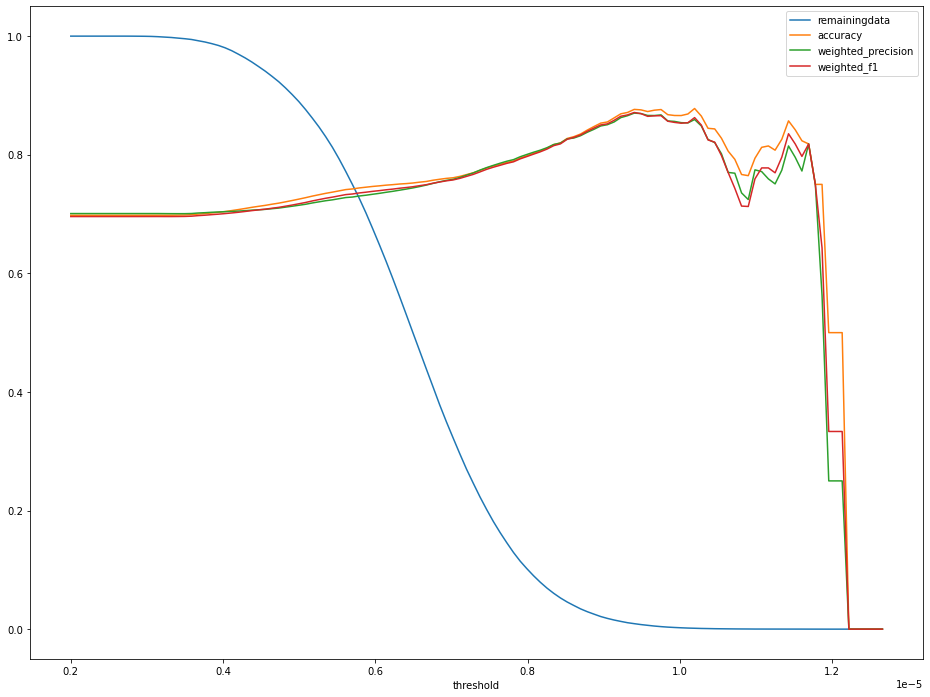

In [19]:
Keyword_vector = {}
Keyword_vector["agent"] =  ['bank','financial','investment','commercial']
Keyword_vector["agent2"] =  ['known','player']
Keyword_vector["agent3"] =  ['organization','unit','entity','company']
Keyword_vector["agent4"] =  ['a professional','er']
Keyword_vector["agent5"] =  ['representatives']
Keyword_vector["agent6"] =  ['golfer','gymnast','cyclist']
Keyword_vector["agent7"] =  ['gymnast']
Keyword_vector["agent8"] =  ['actor','model','pageant']
Keyword_vector["agent9"] =  ['academic','economist','judge','politician']
Keyword_vector["agent10"] =  ['firm','record label','company','trading','Limited']
Keyword_vector["agent11"] =['records','record label','Productions','agency','studio']
Keyword_vector["work"] = ['piece of work','movie','entertainment','album']
Keyword_vector["work2"] = ['piece of work','Academic Journal','written','newspaper']
Keyword_vector["work3"] = ['Eurovision','song']
Keyword_vector["work4"] = ['piece of work','computer','video game']
Keyword_vector["work5"] = ['piece of work','comic','mangas']
Keyword_vector["place"] = ['located','place','town','village']
Keyword_vector["place2"] = ['located','place','Road','Bridge','Railway','Tunnel']
Keyword_vector["place3"] = ['building','tower','hotel']
Keyword_vector["place4"] = ['located','Airport']
Keyword_vector["place5"] = ['church','located','temple','was','built']
Keyword_vector["place6"] = ['hospital','Medical','located']
Keyword_vector["place7"] = ['shopping','mall','center','store','doors']
Keyword_vector["species"] = ['animal','living']
Keyword_vector["species2"] = ['Fungus','flower','plant','green','grow']
Keyword_vector["species3"] = ['Fungus','flower','plant']
Keyword_vector["species4"] = ['Insect','bird','fish','butterfly']
Keyword_vector["unitofwork"] = ['United States','Supreme Court','Legal']
Keyword_vector["event"] = ['event','Election']
Keyword_vector["event2"] = ['battle','event','was']
Keyword_vector["SportsSeason"] = ['sports','Season','Baseball', 'Soccer','teams']
Keyword_vector["Device"] = ['Renault','Mercedes','Chrysler','BMW','Ferrari','car','automotive','engine']
Keyword_vector["TopicalConcept"] = ['musical','subgenres','Melody','folk']


dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(X, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)

labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])

    
    
    
empty=[]
results=pd.DataFrame()
vals=np.linspace(0.000002, 0.00009, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Length_filtered_train['tag']=tags
    Length_filtered_train=Length_filtered_train.replace({'tag' : {0:0,1: 0,  2: 0,  3: 0,  4: 0,  5: 0,  6: 0,  7: 0,  8: 0,  9: 0,  10: 0,  11: 1,  12: 1,  13: 1,  14: 1,  15: 1,  16: 2,  17: 2,  18: 2,  19: 2,  20: 2,  21: 2,  22: 2,  23: 3,  24: 3,  25: 3,  26: 3,  27: 4,  28: 5,  29: 5,  30: 6,  31: 7,  32: 8,  33: 8}})
    Length_filtered_train2=Length_filtered_train[Length_filtered_train['tag']!=999999].reset_index(drop=True)
    if (len(Length_filtered_train2['l1new'])>0 and len(Length_filtered_train2['tag'])>0):
        report=metrics.classification_report(Length_filtered_train2['l1new'], Length_filtered_train2['tag'], digits=6, zero_division=0).split('\n')
        results.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        results.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        results.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        results.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        results.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        results.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        results.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        results.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        results.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        results.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        results.loc[trshld,'length']=len(Length_filtered_train2)
        results.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Length_filtered_train2)])

results['remainingdata']=results['length']/(results['length'].max())
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))
    

In [20]:
referirv=[]
for i in range(len(alltopics)):
    referirv.append(similarities[i].mean())
    
Testds=pd.DataFrame({'text':dataset_DBPedia['test']['text'],'l1':dataset_DBPedia['test']['l1'],'l2':dataset_DBPedia['test']['l2'],'l3':dataset_DBPedia['test']['l3']}).reset_index(drop=True)
Length_filtered_test=Testds[Testds['text'].str.len()<=1000].reset_index(drop=True)
Length_filtered_test['l1new']=Length_filtered_test['l1']
Length_filtered_test=Length_filtered_test.replace({'l1new' : inv_map})    

In [21]:
file="Embeddings\outfile_DBPedia_test.npy"
Embeddingfile = Path(file)
if Embeddingfile.is_file():
    X=np.load(file)
else:
    Meanval = [EmbeddingModel(txt, tokenizer, nlp).mean(0) 
                 for txt in Length_filtered_test['text']]
    X = np.array(Meanval)

<AxesSubplot:xlabel='threshold'>

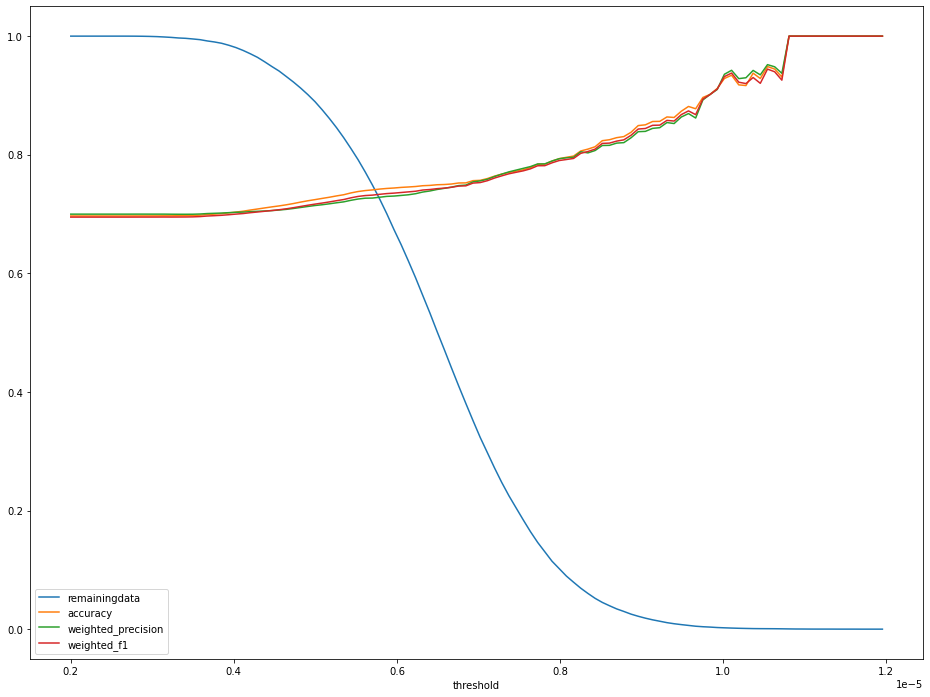

In [22]:
Keyword_vector = {}
Keyword_vector["agent"] =  ['bank','financial','investment','commercial']
Keyword_vector["agent2"] =  ['known','player']
Keyword_vector["agent3"] =  ['organization','unit','entity','company']
Keyword_vector["agent4"] =  ['a professional','er']
Keyword_vector["agent5"] =  ['representatives']
Keyword_vector["agent6"] =  ['golfer','gymnast','cyclist']
Keyword_vector["agent7"] =  ['gymnast']
Keyword_vector["agent8"] =  ['actor','model','pageant']
Keyword_vector["agent9"] =  ['academic','economist','judge','politician']
Keyword_vector["agent10"] =  ['firm','record label','company','trading','Limited']
Keyword_vector["agent11"] =['records','record label','Productions','agency','studio']
Keyword_vector["work"] = ['piece of work','movie','entertainment','album']
Keyword_vector["work2"] = ['piece of work','Academic Journal','written','newspaper']
Keyword_vector["work3"] = ['Eurovision','song']
Keyword_vector["work4"] = ['piece of work','computer','video game']
Keyword_vector["work5"] = ['piece of work','comic','mangas']
Keyword_vector["place"] = ['located','place','town','village']
Keyword_vector["place2"] = ['located','place','Road','Bridge','Railway','Tunnel']
Keyword_vector["place3"] = ['building','tower','hotel']
Keyword_vector["place4"] = ['located','Airport']
Keyword_vector["place5"] = ['church','located','temple','was','built']
Keyword_vector["place6"] = ['hospital','Medical','located']
Keyword_vector["place7"] = ['shopping','mall','center','store','doors']
Keyword_vector["species"] = ['animal','living']
Keyword_vector["species2"] = ['Fungus','flower','plant','green','grow']
Keyword_vector["species3"] = ['Fungus','flower','plant']
Keyword_vector["species4"] = ['Insect','bird','fish','butterfly']
Keyword_vector["unitofwork"] = ['United States','Supreme Court','Legal']
Keyword_vector["event"] = ['event','Election']
Keyword_vector["event2"] = ['battle','event','was']
Keyword_vector["SportsSeason"] = ['sports','Season','Baseball', 'Soccer','teams']
Keyword_vector["Device"] = ['Renault','Mercedes','Chrysler','BMW','Ferrari','car','automotive','engine']
Keyword_vector["TopicalConcept"] = ['musical','subgenres','Melody','folk']


dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(X, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)

meanss=[]
labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])
    meanss.append(similarities[i].mean())
zarayeb = [ii / jj for ii, jj in zip(referirv, meanss)]
for i in range(len(similarities)):

    similarities[i] = (similarities[i])*zarayeb[i]

    
    
    
empty=[]
resultstestds=pd.DataFrame()
vals=np.linspace(0.000002, 0.00009, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Length_filtered_test['tag']=tags
    Length_filtered_test=Length_filtered_test.replace({'tag' : {0:0,1: 0,  2: 0,  3: 0,  4: 0,  5: 0,  6: 0,  7: 0,  8: 0,  9: 0,  10: 0,  11: 1,  12: 1,  13: 1,  14: 1,  15: 1,  16: 2,  17: 2,  18: 2,  19: 2,  20: 2,  21: 2,  22: 2,  23: 3,  24: 3,  25: 3,  26: 3,  27: 4,  28: 5,  29: 5,  30: 6,  31: 7,  32: 8,  33: 8}})
    Length_filtered_test2=Length_filtered_test[Length_filtered_test['tag']!=999999].reset_index(drop=True)
    if (len(Length_filtered_test2['l1new'])>0 and len(Length_filtered_test2['tag'])>0):
        report=metrics.classification_report(Length_filtered_test2['l1new'], Length_filtered_test2['tag'], digits=6, zero_division=0).split('\n')
        resultstestds.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        resultstestds.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        resultstestds.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        resultstestds.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        resultstestds.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        resultstestds.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        resultstestds.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        resultstestds.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        resultstestds.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        resultstestds.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        resultstestds.loc[trshld,'length']=len(Length_filtered_test2)
        resultstestds.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Length_filtered_test2)])

resultstestds['remainingdata']=resultstestds['length']/(resultstestds['length'].max())
resultstestds.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))
   
    


# DBPedia 14

In [23]:
dataset_dbpedia_14 = load_dataset("dbpedia_14")
Trainds=pd.DataFrame({'label':dataset_dbpedia_14['train']['label'],'title':dataset_dbpedia_14['train']['title'],'content':dataset_dbpedia_14['train']['content']}).reset_index(drop=True)
Length_filtered_train=Trainds[Trainds['content'].str.len()<=1000].reset_index(drop=True)
Testds=pd.DataFrame({'label':dataset_dbpedia_14['test']['label'],'title':dataset_dbpedia_14['test']['title'],'content':dataset_dbpedia_14['test']['content']}).reset_index(drop=True)
Length_filtered_test=Testds[Testds['content'].str.len()<=1000].reset_index(drop=True)
Length_filtered_test

Found cached dataset dbpedia_14 (C:/Users/sepehrc/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)


  0%|          | 0/2 [00:00<?, ?it/s]

,label,title,content
0,0,TY KU,TY KU /taɪkuː/ is an American alcoholic bever...
1,0,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...
2,0,Henkel,Henkel AG & Company KGaA operates worldwide w...
3,0,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...
4,0,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...
...,...,...,...
69968,13,Energy Victory,Energy Victory: Winning the War on Terror by ...
69969,13,Bestiario,Bestiario is a book of 8 short stories writte...
69970,13,Wuthering Heights,Wuthering Heights is a novel by Emily Brontë ...
69971,13,L'Indépendant,L'Indépendant is a newspaper published in Lux...


In [24]:
p1=np.load("Embeddings\outfile_dbpedia14_trainp1.npy")
p2=np.load("Embeddings\outfile_dbpedia14_trainp2.npy")
p3=np.load("Embeddings\outfile_dbpedia14_trainp3.npy")
p4=np.load("Embeddings\outfile_dbpedia14_trainp4.npy")
p5=np.load("Embeddings\outfile_dbpedia14_trainp5.npy")
p6=np.load("Embeddings\outfile_dbpedia14_trainp6.npy")

In [25]:
X=np.concatenate((p1,p2,p3,p4,p5,p6))

<AxesSubplot:xlabel='threshold'>

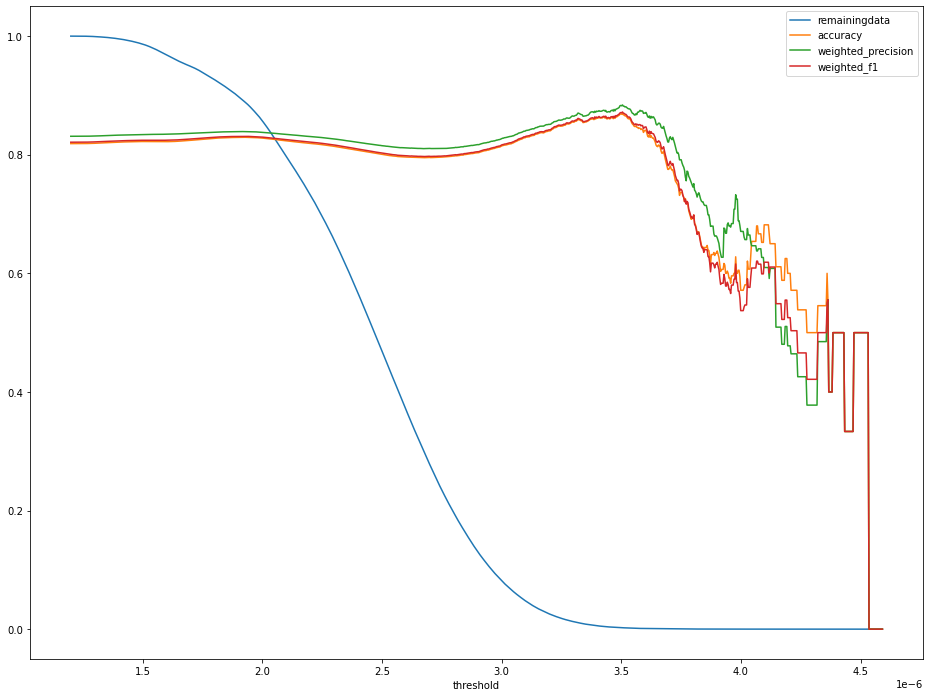

In [26]:
Keyword_vector = {}
Keyword_vector["company1"] =  ['entity','financial','commercial','organization']
Keyword_vector["company2"] =  ['company','group']
Keyword_vector["company3"] =  ['production','corporation','record label']
Keyword_vector["company4"] =  ['company','business']
Keyword_vector["EducationalInstitution"] =  ['university','Educational Institution','college','school']
Keyword_vector["EducationalInstitution2"] =  ['education','learn','definition','reference','degree','university','high school','school']
Keyword_vector["EducationalInstitution3"] =  ['university','high school','school']
Keyword_vector["EducationalInstitution4"] =  ['curriculum', 'students', 'academic','graduation']
Keyword_vector["Artist1"] =  ['stage','name','known','aka']
Keyword_vector["Artist2"] =  ['name','well-known','best know']
Keyword_vector["Artist3"] =  ['person','painter']
Keyword_vector["Artist4"] =  ['person','known','personality','singer', 'songwriter']
Keyword_vector["Artist5"] =  ['biography','singer']
Keyword_vector["Artist6"] =  ['biography','artist']
Keyword_vector["Artist7"] =  ['biography','author','writer']
Keyword_vector["Athlete"] =  ['person','footballer','player']
Keyword_vector["Athlete2"] =  ['team', 'players', 'league', 'teammate', 'scorers','playoff','playing']
Keyword_vector["Athlete3"] =  ['body','playing','football','ball','olympics','baseball','championship']
Keyword_vector["Athlete4"] =  ['known','player']
Keyword_vector["Athlete5"] =  ['NBA','basketball']
Keyword_vector["OfficeHolder"] =  ['politician']
Keyword_vector["OfficeHolder2"] =  ['Politics', 'leaders', 'politicians', 'government', 'political']
Keyword_vector["OfficeHolder3"] =  ['statesman','Mayor', 'leaders','politician', 'President', 'Representative', 'diplomat', 'officer']
Keyword_vector["OfficeHolder4"] =  ['statesman', 'leader','politician']
Keyword_vector["MeanOfTransportation"] =  ['locomotive','ship','Submarine','navy']
Keyword_vector["MeanOfTransportation2"] = ['car','automotive','engine','mercedes','Ferrari']
Keyword_vector["MeanOfTransportation3"] = ['ship','Submarine']
Keyword_vector["MeanOfTransportation4"] = ['aircraft','airplane','NASA','spacecraft']
Keyword_vector["Building"] =  ['Building','hotel','house','developed','located']
Keyword_vector["Building2"] =  ['prison','jail']
Keyword_vector["Building3"] = ['Building','house']
Keyword_vector["Building4"] = ['Building','hotel','house','located']
Keyword_vector["Building5"] = ['shopping','mall','store']
Keyword_vector["Building6"] = ['church','located','temple','built']
Keyword_vector["Building7"] = ['church','located','temple','was','built']
Keyword_vector["Building8"] = ['shopping','mall','center','doors']
Keyword_vector["Building9"] = ['shopping','mall','center','store','doors']
Keyword_vector["NaturalPlace"] =  ['river','Glacier','lake']
Keyword_vector["NaturalPlace2"] =  ['crater']
Keyword_vector["NaturalPlace3"] =  ['lake','river','tributary','natural place']
Keyword_vector["NaturalPlace4"] =  ['mountain range','mountain','ridge','hill']
Keyword_vector["NaturalPlace5"] =  ['volcano','mountain','ridge','natural place']
Keyword_vector["Village"] =  ['Village','District','country']
Keyword_vector["Village2"] =  ['Village','rural','county','city','district']
Keyword_vector["Village3"] =  ['geographical','location','situated in','village','district','region','country','place','census','people','population']
Keyword_vector["Village4"] =  ['geographical','location','census','people','population']
Keyword_vector["Animal"] =  ['Animal','genus','moth','birds','species']
Keyword_vector["Animal2"] =  ['Animal','genus','moth','species']
Keyword_vector["Animal3"] = ['animal','living']
Keyword_vector["Animal4"] = ['Insect','bird','fish','butterfly']
Keyword_vector["Plant"] = ['Fungus','flower','plant','green','grow']
Keyword_vector["Plant2"] = ['Fungus','flower','plant']
Keyword_vector["Plant3"] =  ['Plant','flowering','grass','species']
Keyword_vector["Album"] =  ['Album','studio','music','songs','band','Records label']
Keyword_vector["Album2"] =  ['Album','record']
Keyword_vector["Album3"] =  ['Album','rock','leaked']
Keyword_vector["Film"] =  ['movie','film']
Keyword_vector["Film2"] =  ['Film','movie','written','directed','produced']
Keyword_vector["Film3"] =  ['Film','movie','science fiction','documentary','TV']
Keyword_vector["Film4"] =  ['cinema','action','drama','horror']
Keyword_vector["WrittenWork1"] = ['comic','mangas']
Keyword_vector["WrittenWork2"] = ['book']
Keyword_vector["WrittenWork3"] = ['publish','print']
Keyword_vector["WrittenWork4"] = ['book','comic series']
Keyword_vector["WrittenWork5"] = ['peer-reviewed','scientific','journal']
Keyword_vector["WrittenWork6"] = ['magazine']



dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(X, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)

labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])

  
    
    
empty=[]
results=pd.DataFrame()
vals=np.linspace(0.0000012, 0.0000047, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Length_filtered_train['tag']=tags
    Length_filtered_train=Length_filtered_train.replace({'tag' : {0:0,1: 0, 2: 0, 3: 0, 4: 0, 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 4,
 21: 4,
 22: 4,
 23: 4,
 24: 5,
 25: 5,
 26: 5,
 27: 5,
 28: 6,
 29: 6,
 30: 6,
 31: 6,
 32: 6,
 33: 6,
 34: 6,
 35: 6,
 36: 6,
 37: 7,
 38: 7,
 39: 7,
 40: 7,
 41: 7,
 42: 8,
 43: 8,
 44: 8,
 45: 8,
 46: 9,
 47: 9,
 48: 9,
 49: 9,
 50: 10,
 51: 10,
 52: 10,
 53: 11,
 54: 11,
 55: 11,
 56: 12,
 57: 12,
 58: 12,
 59: 12,
 60: 13,
 61: 13,
 62: 13,
 63: 13,
 64: 13,
 65: 13}})
    Length_filtered_train2=Length_filtered_train[Length_filtered_train['tag']!=999999].reset_index(drop=True)
    if (len(Length_filtered_train2['label'])>0 and len(Length_filtered_train2['tag'])>0):
        report=metrics.classification_report(Length_filtered_train2['label'], Length_filtered_train2['tag'], digits=6, zero_division=0).split('\n')
        results.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        results.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        results.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        results.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        results.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        results.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        results.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        results.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        results.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        results.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        results.loc[trshld,'length']=len(Length_filtered_train2)
        results.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Length_filtered_train2)])

results['remainingdata']=results['length']/(results['length'].max())     
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))
    


In [27]:
referirv=[]
for i in range(len(alltopics)):
    referirv.append(similarities[i].mean())
X=np.load("Embeddings\outfile_dbpedia14_test.npy")


<AxesSubplot:xlabel='threshold'>

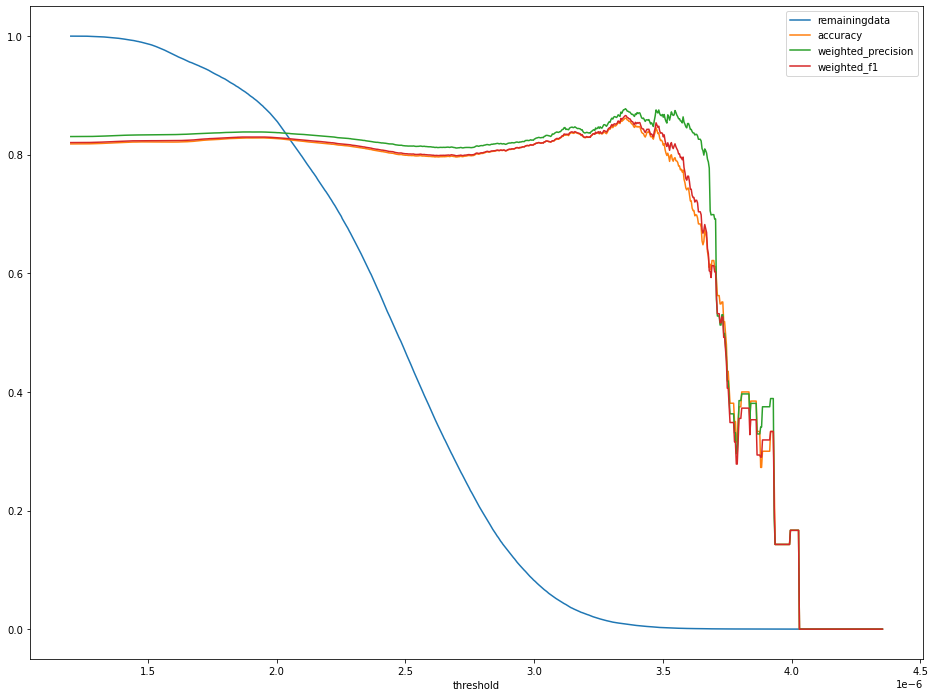

In [28]:
Keyword_vector = {}
Keyword_vector["company1"] =  ['entity','financial','commercial','organization']
Keyword_vector["company2"] =  ['company','group']
Keyword_vector["company3"] =  ['production','corporation','record label']
Keyword_vector["company4"] =  ['company','business']
Keyword_vector["EducationalInstitution"] =  ['university','Educational Institution','college','school']
Keyword_vector["EducationalInstitution2"] =  ['education','learn','definition','reference','degree','university','high school','school']
Keyword_vector["EducationalInstitution3"] =  ['university','high school','school']
Keyword_vector["EducationalInstitution4"] =  ['curriculum', 'students', 'academic','graduation']
Keyword_vector["Artist1"] =  ['stage','name','known','aka']
Keyword_vector["Artist2"] =  ['name','well-known','best know']
Keyword_vector["Artist3"] =  ['person','painter']
Keyword_vector["Artist4"] =  ['person','known','personality','singer', 'songwriter']
Keyword_vector["Artist5"] =  ['biography','singer']
Keyword_vector["Artist6"] =  ['biography','artist']
Keyword_vector["Artist7"] =  ['biography','author','writer']
Keyword_vector["Athlete"] =  ['person','footballer','player']
Keyword_vector["Athlete2"] =  ['team', 'players', 'league', 'teammate', 'scorers','playoff','playing']
Keyword_vector["Athlete3"] =  ['body','playing','football','ball','olympics','baseball','championship']
Keyword_vector["Athlete4"] =  ['known','player']
Keyword_vector["Athlete5"] =  ['NBA','basketball']
Keyword_vector["OfficeHolder"] =  ['politician']
Keyword_vector["OfficeHolder2"] =  ['Politics', 'leaders', 'politicians', 'government', 'political']
Keyword_vector["OfficeHolder3"] =  ['statesman','Mayor', 'leaders','politician', 'President', 'Representative', 'diplomat', 'officer']
Keyword_vector["OfficeHolder4"] =  ['statesman', 'leader','politician']
Keyword_vector["MeanOfTransportation"] =  ['locomotive','ship','Submarine','navy']
Keyword_vector["MeanOfTransportation2"] = ['car','automotive','engine','mercedes','Ferrari']
Keyword_vector["MeanOfTransportation3"] = ['ship','Submarine']
Keyword_vector["MeanOfTransportation4"] = ['aircraft','airplane','NASA','spacecraft']
Keyword_vector["Building"] =  ['Building','hotel','house','developed','located']
Keyword_vector["Building2"] =  ['prison','jail']
Keyword_vector["Building3"] = ['Building','house']
Keyword_vector["Building4"] = ['Building','hotel','house','located']
Keyword_vector["Building5"] = ['shopping','mall','store']
Keyword_vector["Building6"] = ['church','located','temple','built']
Keyword_vector["Building7"] = ['church','located','temple','was','built']
Keyword_vector["Building8"] = ['shopping','mall','center','doors']
Keyword_vector["Building9"] = ['shopping','mall','center','store','doors']
Keyword_vector["NaturalPlace"] =  ['river','Glacier','lake']
Keyword_vector["NaturalPlace2"] =  ['crater']
Keyword_vector["NaturalPlace3"] =  ['lake','river','tributary','natural place']
Keyword_vector["NaturalPlace4"] =  ['mountain range','mountain','ridge','hill']
Keyword_vector["NaturalPlace5"] =  ['volcano','mountain','ridge','natural place']
Keyword_vector["Village"] =  ['Village','District','country']
Keyword_vector["Village2"] =  ['Village','rural','county','city','district']
Keyword_vector["Village3"] =  ['geographical','location','situated in','village','district','region','country','place','census','people','population']
Keyword_vector["Village4"] =  ['geographical','location','census','people','population']
Keyword_vector["Animal"] =  ['Animal','genus','moth','birds','species']
Keyword_vector["Animal2"] =  ['Animal','genus','moth','species']
Keyword_vector["Animal3"] = ['animal','living']
Keyword_vector["Animal4"] = ['Insect','bird','fish','butterfly']
Keyword_vector["Plant"] = ['Fungus','flower','plant','green','grow']
Keyword_vector["Plant2"] = ['Fungus','flower','plant']
Keyword_vector["Plant3"] =  ['Plant','flowering','grass','species']
Keyword_vector["Album"] =  ['Album','studio','music','songs','band','Records label']
Keyword_vector["Album2"] =  ['Album','record']
Keyword_vector["Album3"] =  ['Album','rock','leaked']
Keyword_vector["Film"] =  ['movie','film']
Keyword_vector["Film2"] =  ['Film','movie','written','directed','produced']
Keyword_vector["Film3"] =  ['Film','movie','science fiction','documentary','TV']
Keyword_vector["Film4"] =  ['cinema','action','drama','horror']
Keyword_vector["WrittenWork1"] = ['comic','mangas']
Keyword_vector["WrittenWork2"] = ['book']
Keyword_vector["WrittenWork3"] = ['publish','print']
Keyword_vector["WrittenWork4"] = ['book','comic series']
Keyword_vector["WrittenWork5"] = ['peer-reviewed','scientific','journal']
Keyword_vector["WrittenWork6"] = ['magazine']



dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(X, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)


meanss=[]
labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])
    meanss.append(similarities[i].mean())
zarayeb = [ii / jj for ii, jj in zip(referirv, meanss)]
for i in range(len(similarities)):

    similarities[i] = (similarities[i])*zarayeb[i]
    
    
    
empty=[]
results=pd.DataFrame()
vals=np.linspace(0.0000012, 0.0000047, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Length_filtered_test['tag']=tags
    Length_filtered_test=Length_filtered_test.replace({'tag' : {0:0,1: 0, 2: 0, 3: 0, 4: 0, 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 4,
 21: 4,
 22: 4,
 23: 4,
 24: 5,
 25: 5,
 26: 5,
 27: 5,
 28: 6,
 29: 6,
 30: 6,
 31: 6,
 32: 6,
 33: 6,
 34: 6,
 35: 6,
 36: 6,
 37: 7,
 38: 7,
 39: 7,
 40: 7,
 41: 7,
 42: 8,
 43: 8,
 44: 8,
 45: 8,
 46: 9,
 47: 9,
 48: 9,
 49: 9,
 50: 10,
 51: 10,
 52: 10,
 53: 11,
 54: 11,
 55: 11,
 56: 12,
 57: 12,
 58: 12,
 59: 12,
 60: 13,
 61: 13,
 62: 13,
 63: 13,
 64: 13,
 65: 13}})
    Length_filtered_test2=Length_filtered_test[Length_filtered_test['tag']!=999999].reset_index(drop=True)
    if (len(Length_filtered_test2['label'])>0 and len(Length_filtered_test2['tag'])>0):
        report=metrics.classification_report(Length_filtered_test2['label'], Length_filtered_test2['tag'], digits=6, zero_division=0).split('\n')
        results.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        results.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        results.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        results.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        results.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        results.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        results.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        results.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        results.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        results.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        results.loc[trshld,'length']=len(Length_filtered_test2)
        results.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Length_filtered_test2)])

results['remainingdata']=results['length']/(results['length'].max())     
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))
      

# Yahoo! Answers

In [29]:
dataset_yahoo = load_dataset("yahoo_answers_topics")
Trainds=pd.DataFrame({'id':dataset_yahoo['train']['id'],'topic':dataset_yahoo['train']['topic'],'question_title':dataset_yahoo['train']['question_title'],'question_content':dataset_yahoo['train']['question_content'],'best_answer':dataset_yahoo['train']['best_answer']}).reset_index(drop=True)
Trainds['qq']=Trainds['question_title']+' '+Trainds['question_content']
Length_filtered_trainqq=Trainds[Trainds['qq'].str.len()<=1000].reset_index(drop=True)
Length_filtered_trainan=Trainds[Trainds['best_answer'].str.len()<=1000].reset_index(drop=True)
Testds=pd.DataFrame({'id':dataset_yahoo['test']['id'],'topic':dataset_yahoo['test']['topic'],'question_title':dataset_yahoo['test']['question_title'],'question_content':dataset_yahoo['test']['question_content'],'best_answer':dataset_yahoo['test']['best_answer']}).reset_index(drop=True)
Testds['qq']=Testds['question_title']+' '+Testds['question_content']
Length_filtered_testqq=Testds[Testds['qq'].str.len()<=1000].reset_index(drop=True)
Length_filtered_testan=Testds[Testds['best_answer'].str.len()<=1000].reset_index(drop=True)

Found cached dataset yahoo_answers_topics (C:/Users/sepehrc/.cache/huggingface/datasets/yahoo_answers_topics/yahoo_answers_topics/1.0.0/0edb353eefe79d9245d7bd7cac5ae6af19530439da520d6dde1c206ee38f4439)


  0%|          | 0/2 [00:00<?, ?it/s]

In [30]:
p0=np.load("Embeddings\outfile_yahoo_trainan_0.npy")
p1=np.load("Embeddings\outfile_yahoo_trainan_1.npy")
p2=np.load("Embeddings\outfile_yahoo_trainan_2.npy")
p3=np.load("Embeddings\outfile_yahoo_trainan_3.npy")
p4=np.load("Embeddings\outfile_yahoo_trainan_4.npy")
p5=np.load("Embeddings\outfile_yahoo_trainan_5.npy")
p6=np.load("Embeddings\outfile_yahoo_trainan_6.npy")
p7=np.load("Embeddings\outfile_yahoo_trainan_7.npy")
p8=np.load("Embeddings\outfile_yahoo_trainan_8.npy")
p9=np.load("Embeddings\outfile_yahoo_trainan_9.npy")
p10=np.load("Embeddings\outfile_yahoo_trainan_10.npy")
p11=np.load("Embeddings\outfile_yahoo_trainan_11.npy")
p12=np.load("Embeddings\outfile_yahoo_trainan_12.npy")
p13=np.load("Embeddings\outfile_yahoo_trainan_13.npy")
X=np.concatenate((p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13))

In [31]:
Tokencount=pd.read_json('Embeddings\yahoobest_answertokenCounts.json')
Outoflimit=Tokencount[Tokencount[1]>=513]

In [32]:
Length_filtered_trainanclean=Length_filtered_trainan.drop(Outoflimit.index).reset_index(drop=True)

In [33]:
Emptydocs=Length_filtered_trainanclean[Length_filtered_trainanclean['best_answer'].str.len()==0]
Length_filtered_trainanclean2=Length_filtered_trainanclean.drop(Emptydocs.index).reset_index(drop=True)

In [34]:
XX=np.delete(X, Emptydocs.index, 0)

<AxesSubplot:xlabel='threshold'>

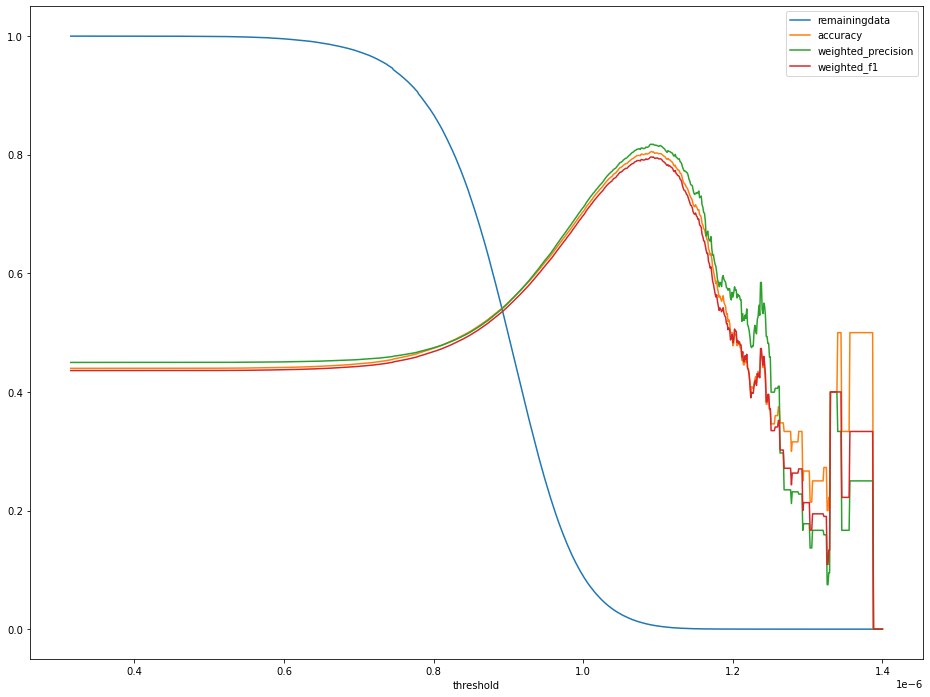

In [35]:
Keyword_vector = {}
Keyword_vector["SocietyCulture"] =  ['socially','people','culture','tradition','it means']
Keyword_vector["SocietyCulture2"] =  ['believers', 'righteousness', 'righteous', 'pious', 'spirituality', 'sinfully','worldly']
Keyword_vector["SocietyCulture3"] =  ['god','religion','hell','heaven']
Keyword_vector["SocietyCulture4"] =  ['socially','people','culture','tradition','it means','socially']
Keyword_vector["ScienceMathematics"] =  ['Science','Mathematics','physics','Chemicals','water','Procedure','astronomy','theory']
Keyword_vector["ScienceMathematics2"] =  ['Science','Math','physics','Chemicals','waters','Procedure','astronomical','theoretical']
Keyword_vector["ScienceMathematics3"] =  ['Science','planet','rocks','evolution','satellite']
Keyword_vector["ScienceMathematics4"] =  ['Chemicals','water','Procedure','astronomy','theory']
Keyword_vector["Health"] =  ['Health','body','therapy','medical','drug','diet','symptom','sexual','cancer']
Keyword_vector["Health2"] =  ['Health','body','therapy','medical','symptoms']
Keyword_vector["Health3"] =  ['Health','body','therapy','medical','symptom']
Keyword_vector["EducationReference"] =  ['education','learn','definition','reference','degree','university','high school','school']
Keyword_vector["EducationReference2"] =  ['university','high school','school']
Keyword_vector["EducationReference3"] =  ['courses','curriculum', 'students', 'faculty', 'syllabus', 'academic','graduation']
Keyword_vector["ComputersInternet"] =  ['computer','internet','username','code','program','download','network','game','online','click','email','monitor','server','operating system','hardware','software','memory']
Keyword_vector["ComputersInternet2"] =  ['how','click','mac','linux','operating system','windows','software']
Keyword_vector["Sports"] =  ['team', 'players', 'teams', 'scorings', 'league', 'teammate', 'scorers','playoff','playing']
Keyword_vector["Sports2"] =  ['Sports','body','playing','football','ball','olympics','baseball','championship']
Keyword_vector["BusinessFinance"] =  ['it means','company','Business','Finance','money','investment','buy','sell','stocks','market','insurance','property','mortgage','broker','economy','renting']
Keyword_vector["BusinessFinance2"] =  ['securities', 'unpaid', 'equity', 'payments', 'broker', 'underwriting', 'payable','underwriter']
Keyword_vector["EntertainmentMusic"] =  ['Entertainment','Music','artists','movies','songs','mp3','book','rock stars']
Keyword_vector["EntertainmentMusic2"] =  ['Entertainment','actress','movies','actors','film','written','author']
Keyword_vector["EntertainmentMusic3"] =  ['play','tv','series','author']
Keyword_vector["EntertainmentMusic4"] =  ['play','tv','series','author','song', 'sings', 'singer', 'artist', 'album']
Keyword_vector["FamilyRelationships"] =  ['Family','Relationships','girlfriend','boyfriend','husband','wife','love','sex']
Keyword_vector["PoliticsGovernment"] =  ['Politics','legal','law','illegal','congress','patriot','voting','america', 'leaders', 'politicians', 'government', 'democracy', 'political', 'terrorists','partisan']

dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(XX, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)

labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])

    
empty=[]
results=pd.DataFrame()
vals=np.linspace(0.000000315, 0.0000014, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Length_filtered_trainanclean2['tag']=tags
    Length_filtered_trainanclean2=Length_filtered_trainanclean2.replace({'tag' : {0:0,1:0,2:0,3:0,4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 3,
 12: 3,
 13: 3,
 14: 4,
 15: 4,
 16: 5,
 17: 5,
 18: 6,
 19: 6,
 20: 7,
 21: 7,
 22: 7,
 23: 7,
 24: 8,
 25: 9}})
    Length_filtered_trainanclean22=Length_filtered_trainanclean2[Length_filtered_trainanclean2['tag']!=999999].reset_index(drop=True)
    if (len(Length_filtered_trainanclean22['topic'])>0 and len(Length_filtered_trainanclean22['tag'])>0):
        report=metrics.classification_report(Length_filtered_trainanclean22['topic'], Length_filtered_trainanclean22['tag'], digits=6, zero_division=0).split('\n')
        results.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        results.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        results.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        results.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        results.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        results.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        results.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        results.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        results.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        results.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        results.loc[trshld,'length']=len(Length_filtered_trainanclean22)
        results.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Length_filtered_trainanclean22)])

results['remainingdata']=results['length']/(results['length'].max())
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))


In [36]:
referirv=[]
for i in range(len(alltopics)):
    referirv.append(similarities[i].mean())

In [37]:
X=np.load("Embeddings\outfile_yahoo_testan_0.npy")

In [38]:
def EmbeddingModeltok(txt, tokenizer, nlp):
    idx = tokenizer.encode(txt)
    idx = np.array(idx)[None,:]  

    return idx

In [39]:
vv = [EmbeddingModeltok(txt, tokenizer, nlp) 
                     for txt in Length_filtered_testan['best_answer']]
Tok=[]
for i in range(len(vv)):
    Tok.append([i,len(vv[i][0])])
Tokencount=pd.DataFrame(Tok)
Outoflimit=Tokencount[Tokencount[1]>=513]
Length_filtered_testanclean=Length_filtered_testan.drop(Outoflimit.index).reset_index(drop=True)

Token indices sequence length is longer than the specified maximum sequence length for this model (518 > 512). Running this sequence through the model will result in indexing errors


In [40]:
Emptydocs=Length_filtered_testanclean[Length_filtered_testanclean['best_answer'].str.len()==0]
Length_filtered_testanclean2=Length_filtered_testanclean.drop(Emptydocs.index).reset_index(drop=True)

In [41]:
XX=np.delete(X, Emptydocs.index, 0)

In [42]:
len(Length_filtered_testanclean)

55708

In [43]:
len(XX)

54674

<AxesSubplot:xlabel='threshold'>

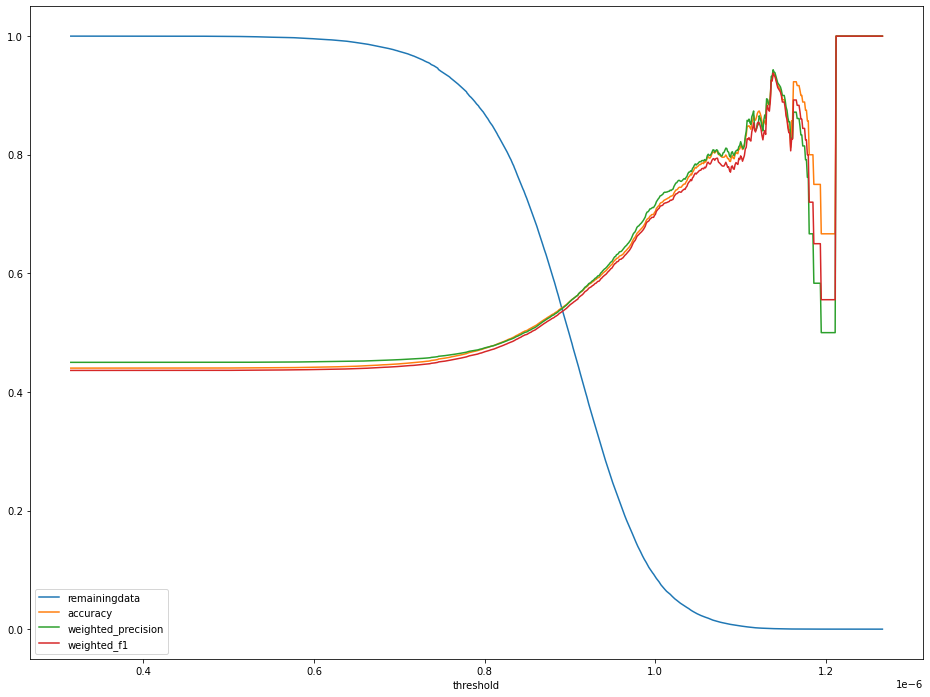

In [44]:
Keyword_vector = {}
Keyword_vector["SocietyCulture"] =  ['socially','people','culture','tradition','it means']
Keyword_vector["SocietyCulture2"] =  ['believers', 'righteousness', 'righteous', 'pious', 'spirituality', 'sinfully','worldly']
Keyword_vector["SocietyCulture3"] =  ['god','religion','hell','heaven']
Keyword_vector["SocietyCulture4"] =  ['socially','people','culture','tradition','it means','socially']
Keyword_vector["ScienceMathematics"] =  ['Science','Mathematics','physics','Chemicals','water','Procedure','astronomy','theory']
Keyword_vector["ScienceMathematics2"] =  ['Science','Math','physics','Chemicals','waters','Procedure','astronomical','theoretical']
Keyword_vector["ScienceMathematics3"] =  ['Science','planet','rocks','evolution','satellite']
Keyword_vector["ScienceMathematics4"] =  ['Chemicals','water','Procedure','astronomy','theory']
Keyword_vector["Health"] =  ['Health','body','therapy','medical','drug','diet','symptom','sexual','cancer']
Keyword_vector["Health2"] =  ['Health','body','therapy','medical','symptoms']
Keyword_vector["Health3"] =  ['Health','body','therapy','medical','symptom']
Keyword_vector["EducationReference"] =  ['education','learn','definition','reference','degree','university','high school','school']
Keyword_vector["EducationReference2"] =  ['university','high school','school']
Keyword_vector["EducationReference3"] =  ['courses','curriculum', 'students', 'faculty', 'syllabus', 'academic','graduation']
Keyword_vector["ComputersInternet"] =  ['computer','internet','username','code','program','download','network','game','online','click','email','monitor','server','operating system','hardware','software','memory']
Keyword_vector["ComputersInternet2"] =  ['how','click','mac','linux','operating system','windows','software']
Keyword_vector["Sports"] =  ['team', 'players', 'teams', 'scorings', 'league', 'teammate', 'scorers','playoff','playing']
Keyword_vector["Sports2"] =  ['Sports','body','playing','football','ball','olympics','baseball','championship']
Keyword_vector["BusinessFinance"] =  ['it means','company','Business','Finance','money','investment','buy','sell','stocks','market','insurance','property','mortgage','broker','economy','renting']
Keyword_vector["BusinessFinance2"] =  ['securities', 'unpaid', 'equity', 'payments', 'broker', 'underwriting', 'payable','underwriter']
Keyword_vector["EntertainmentMusic"] =  ['Entertainment','Music','artists','movies','songs','mp3','book','rock stars']
Keyword_vector["EntertainmentMusic2"] =  ['Entertainment','actress','movies','actors','film','written','author']
Keyword_vector["EntertainmentMusic3"] =  ['play','tv','series','author']
Keyword_vector["EntertainmentMusic4"] =  ['play','tv','series','author','song', 'sings', 'singer', 'artist', 'album']
Keyword_vector["FamilyRelationships"] =  ['Family','Relationships','girlfriend','boyfriend','husband','wife','love','sex']
Keyword_vector["PoliticsGovernment"] =  ['Politics','legal','law','illegal','congress','patriot','voting','america', 'leaders', 'politicians', 'government', 'democracy', 'political', 'terrorists','partisan']

dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(XX, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)


meanss=[]
labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])
    meanss.append(similarities[i].mean())
zarayeb = [ii / jj for ii, jj in zip(referirv, meanss)]
for i in range(len(similarities)):

    similarities[i] = (similarities[i])*zarayeb[i]
    
    
    
empty=[]
results=pd.DataFrame()
vals=np.linspace(0.000000315, 0.0000014, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Length_filtered_testanclean2['tag']=tags
    Length_filtered_testanclean2=Length_filtered_testanclean2.replace({'tag' : {0:0,1:0,2:0,3:0,4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 3,
 12: 3,
 13: 3,
 14: 4,
 15: 4,
 16: 5,
 17: 5,
 18: 6,
 19: 6,
 20: 7,
 21: 7,
 22: 7,
 23: 7,
 24: 8,
 25: 9}})
    Length_filtered_testanclean22=Length_filtered_testanclean2[Length_filtered_testanclean2['tag']!=999999].reset_index(drop=True)
    if (len(Length_filtered_testanclean22['topic'])>0 and len(Length_filtered_testanclean22['tag'])>0):
        report=metrics.classification_report(Length_filtered_testanclean22['topic'], Length_filtered_testanclean22['tag'], digits=6, zero_division=0).split('\n')
        results.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        results.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        results.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        results.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        results.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        results.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        results.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        results.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        results.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        results.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        results.loc[trshld,'length']=len(Length_filtered_testanclean22)
        results.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Length_filtered_testanclean22)])

results['remainingdata']=results['length']/(results['length'].max())
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))


# Yahoo! Questions

In [45]:
p0=np.load("yahoo\outfile_yahoo_trainqq_0.npy")
p1=np.load("yahoo\outfile_yahoo_trainqq_1.npy")
p2=np.load("yahoo\outfile_yahoo_trainqq_2.npy")
p3=np.load("yahoo\outfile_yahoo_trainqq_3.npy")
p4=np.load("yahoo\outfile_yahoo_trainqq_4.npy")
p5=np.load("yahoo\outfile_yahoo_trainqq_5.npy")
p6=np.load("yahoo\outfile_yahoo_trainqq_6.npy")
p7=np.load("yahoo\outfile_yahoo_trainqq_7.npy")
p8=np.load("yahoo\outfile_yahoo_trainqq_8.npy")
p9=np.load("yahoo\outfile_yahoo_trainqq_9.npy")
p10=np.load("yahoo\outfile_yahoo_trainqq_10.npy")
p11=np.load("yahoo\outfile_yahoo_trainqq_11.npy")
p12=np.load("yahoo\outfile_yahoo_trainqq_12.npy")
p13=np.load("yahoo\outfile_yahoo_trainqq_13.npy")
X=np.concatenate((p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13))

In [46]:
Tokencount=pd.read_json('Embeddings\yahooqqtokenCounts.json')
Outoflimit=Tokencount[Tokencount[1]>=513]
Length_filtered_trainqqclean=Length_filtered_trainqq.drop(Outoflimit.index).reset_index(drop=True)

In [47]:
Emptydocs=Length_filtered_trainqqclean[Length_filtered_trainqqclean['qq'].str.len()==0]
Length_filtered_trainqqclean2=Length_filtered_trainqqclean.drop(Emptydocs.index).reset_index(drop=True)

In [48]:
XX=np.delete(X, Emptydocs.index, 0)

<AxesSubplot:xlabel='threshold'>

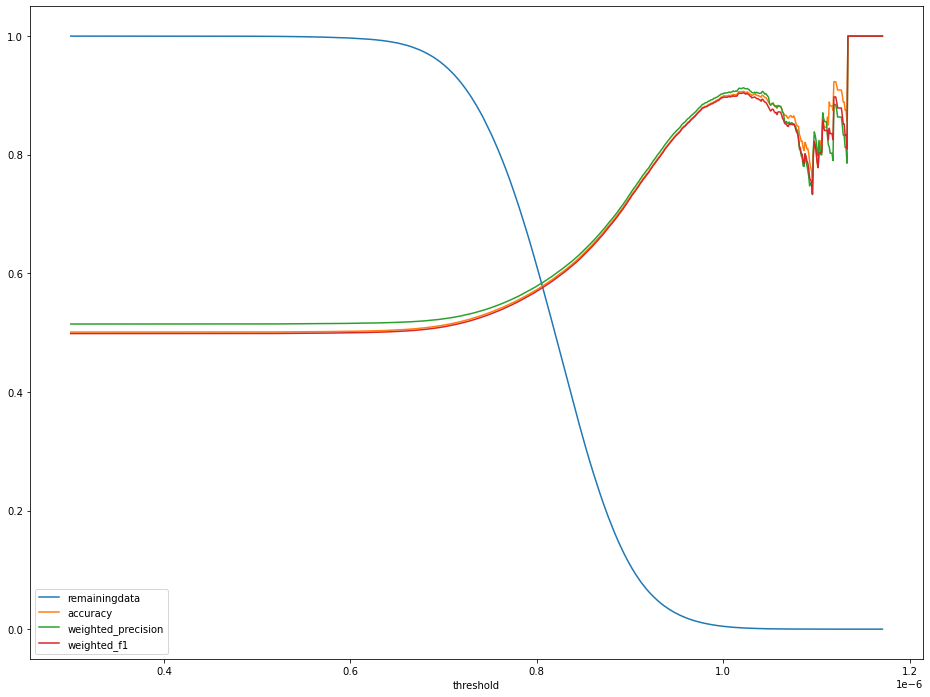

In [49]:
Keyword_vector = {}
Keyword_vector["SocietyCulture"] =  ['socially','people','culture','tradition','it means']
Keyword_vector["SocietyCulture2"] =  ['believers', 'righteousness', 'righteous', 'pious', 'spirituality', 'sinfully','worldly']
Keyword_vector["SocietyCulture3"] =  ['god','religion','hell','heaven']
Keyword_vector["SocietyCulture4"] =  ['socially','people','culture','tradition','it means','socially']
Keyword_vector["ScienceMathematics"] =  ['Science','Mathematics','physics','Chemicals','water','Procedure','astronomy','theory']
Keyword_vector["ScienceMathematics2"] =  ['Science','Math','physics','Chemicals','waters','Procedure','astronomical','theoretical']
Keyword_vector["ScienceMathematics3"] =  ['Science','planet','rocks','evolution','satellite']
Keyword_vector["ScienceMathematics4"] =  ['Chemicals','water','Procedure','astronomy','theory']
Keyword_vector["Health"] =  ['Health','body','therapy','medical','drug','diet','symptom','sexual','cancer']
Keyword_vector["Health2"] =  ['Health','body','therapy','medical','symptoms']
Keyword_vector["Health3"] =  ['Health','body','therapy','medical','symptom']
Keyword_vector["EducationReference"] =  ['education','learn','definition','reference','degree','university','high school','school']
Keyword_vector["EducationReference2"] =  ['university','high school','school']
Keyword_vector["EducationReference3"] =  ['courses','curriculum', 'students', 'faculty', 'syllabus', 'academic','graduation']
Keyword_vector["ComputersInternet"] =  ['computer','internet','username','code','program','download','network','game','online','click','email','monitor','server','operating system','hardware','software','memory']
Keyword_vector["ComputersInternet2"] =  ['how','click','mac','linux','operating system','windows','software']
Keyword_vector["Sports"] =  ['team', 'players', 'teams', 'scorings', 'league', 'teammate', 'scorers','playoff','playing']
Keyword_vector["Sports2"] =  ['Sports','body','playing','football','ball','olympics','baseball','championship']
Keyword_vector["BusinessFinance"] =  ['it means','company','Business','Finance','money','investment','buy','sell','stocks','market','insurance','property','mortgage','broker','economy','renting']
Keyword_vector["BusinessFinance2"] =  ['securities', 'unpaid', 'equity', 'payments', 'broker', 'underwriting', 'payable','underwriter']
Keyword_vector["EntertainmentMusic"] =  ['Entertainment','Music','artists','movies','songs','mp3','book','rock stars']
Keyword_vector["EntertainmentMusic2"] =  ['Entertainment','actress','movies','actors','film','written','author']
Keyword_vector["EntertainmentMusic3"] =  ['play','tv','series','author']
Keyword_vector["EntertainmentMusic4"] =  ['play','tv','series','author','song', 'sings', 'singer', 'artist', 'album']
Keyword_vector["FamilyRelationships"] =  ['Family','Relationships','girlfriend','boyfriend','husband','wife','love','sex']
Keyword_vector["PoliticsGovernment"] =  ['Politics','legal','law','illegal','congress','patriot','voting','america', 'leaders', 'politicians', 'government', 'democracy', 'political', 'terrorists','partisan']


dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(XX, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)

labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])

    
empty=[]
results=pd.DataFrame()
vals=np.linspace(0.0000003, 0.0000013, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Length_filtered_trainqqclean2['tag']=tags
    Length_filtered_trainqqclean2=Length_filtered_trainqqclean2.replace({'tag' : {0:0,1:0,2:0,3:0,4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 3,
 12: 3,
 13: 3,
 14: 4,
 15: 4,
 16: 5,
 17: 5,
 18: 6,
 19: 6,
 20: 7,
 21: 7,
 22: 7,
 23: 7,
 24: 8,
 25: 9}})
    Length_filtered_trainqqclean22=Length_filtered_trainqqclean2[Length_filtered_trainqqclean2['tag']!=999999].reset_index(drop=True)
    if (len(Length_filtered_trainqqclean22['topic'])>0 and len(Length_filtered_trainqqclean22['tag'])>0):
        report=metrics.classification_report(Length_filtered_trainqqclean22['topic'], Length_filtered_trainqqclean22['tag'], digits=6, zero_division=0).split('\n')
        results.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        results.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        results.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        results.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        results.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        results.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        results.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        results.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        results.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        results.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        results.loc[trshld,'length']=len(Length_filtered_trainqqclean22)
        results.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Length_filtered_trainqqclean22)])

results['remainingdata']=results['length']/(results['length'].max())
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))


In [50]:
referirv=[]
for i in range(len(alltopics)):
    referirv.append(similarities[i].mean())

In [51]:
X=np.load("Embeddings\outfile_yahoo_testqq_0.npy")

In [52]:
vv = [EmbeddingModeltok(txt, tokenizer, nlp) 
                     for txt in Length_filtered_testqq['qq']]
Tok=[]
for i in range(len(vv)):
    Tok.append([i,len(vv[i][0])])
Tokencount=pd.DataFrame(Tok)
Outoflimit=Tokencount[Tokencount[1]>=513]
Length_filtered_testqqclean=Length_filtered_testqq.drop(Outoflimit.index).reset_index(drop=True)

In [53]:
Emptydocs=Length_filtered_testqqclean[Length_filtered_testqqclean['best_answer'].str.len()==0]
Length_filtered_testqqclean2=Length_filtered_testqqclean.drop(Emptydocs.index).reset_index(drop=True)

In [54]:
XX=np.delete(X, Emptydocs.index, 0)

<AxesSubplot:xlabel='threshold'>

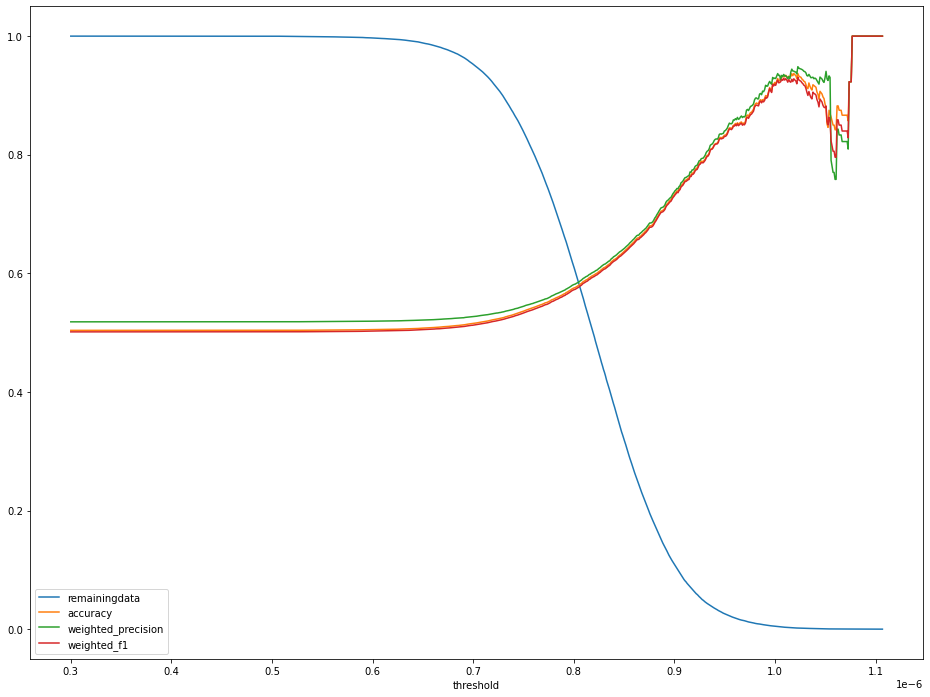

In [55]:
Keyword_vector = {}
Keyword_vector["SocietyCulture"] =  ['socially','people','culture','tradition','it means']
Keyword_vector["SocietyCulture2"] =  ['believers', 'righteousness', 'righteous', 'pious', 'spirituality', 'sinfully','worldly']
Keyword_vector["SocietyCulture3"] =  ['god','religion','hell','heaven']
Keyword_vector["SocietyCulture4"] =  ['socially','people','culture','tradition','it means','socially']
Keyword_vector["ScienceMathematics"] =  ['Science','Mathematics','physics','Chemicals','water','Procedure','astronomy','theory']
Keyword_vector["ScienceMathematics2"] =  ['Science','Math','physics','Chemicals','waters','Procedure','astronomical','theoretical']
Keyword_vector["ScienceMathematics3"] =  ['Science','planet','rocks','evolution','satellite']
Keyword_vector["ScienceMathematics4"] =  ['Chemicals','water','Procedure','astronomy','theory']
Keyword_vector["Health"] =  ['Health','body','therapy','medical','drug','diet','symptom','sexual','cancer']
Keyword_vector["Health2"] =  ['Health','body','therapy','medical','symptoms']
Keyword_vector["Health3"] =  ['Health','body','therapy','medical','symptom']
Keyword_vector["EducationReference"] =  ['education','learn','definition','reference','degree','university','high school','school']
Keyword_vector["EducationReference2"] =  ['university','high school','school']
Keyword_vector["EducationReference3"] =  ['courses','curriculum', 'students', 'faculty', 'syllabus', 'academic','graduation']
Keyword_vector["ComputersInternet"] =  ['computer','internet','username','code','program','download','network','game','online','click','email','monitor','server','operating system','hardware','software','memory']
Keyword_vector["ComputersInternet2"] =  ['how','click','mac','linux','operating system','windows','software']
Keyword_vector["Sports"] =  ['team', 'players', 'teams', 'scorings', 'league', 'teammate', 'scorers','playoff','playing']
Keyword_vector["Sports2"] =  ['Sports','body','playing','football','ball','olympics','baseball','championship']
Keyword_vector["BusinessFinance"] =  ['it means','company','Business','Finance','money','investment','buy','sell','stocks','market','insurance','property','mortgage','broker','economy','renting']
Keyword_vector["BusinessFinance2"] =  ['securities', 'unpaid', 'equity', 'payments', 'broker', 'underwriting', 'payable','underwriter']
Keyword_vector["EntertainmentMusic"] =  ['Entertainment','Music','artists','movies','songs','mp3','book','rock stars']
Keyword_vector["EntertainmentMusic2"] =  ['Entertainment','actress','movies','actors','film','written','author']
Keyword_vector["EntertainmentMusic3"] =  ['play','tv','series','author']
Keyword_vector["EntertainmentMusic4"] =  ['play','tv','series','author','song', 'sings', 'singer', 'artist', 'album']
Keyword_vector["FamilyRelationships"] =  ['Family','Relationships','girlfriend','boyfriend','husband','wife','love','sex']
Keyword_vector["PoliticsGovernment"] =  ['Politics','legal','law','illegal','congress','patriot','voting','america', 'leaders', 'politicians', 'government', 'democracy', 'political', 'terrorists','partisan']


dic_y = {k:EmbeddingModel(v, tokenizer, nlp).mean(0) for k,v in Keyword_vector.items()}

alltopics=[]
for i in dic_y:
    alltopics.append(dic_y[i].reshape(-1, 1))

similarities=[]
for i in range(len(alltopics)):
    zz=metrics.pairwise.cosine_similarity(XX, alltopics[i].T)
    similarities.append(zz)
    
similarities=np.array(similarities)


meanss=[]
labels = list(dic_y.keys())
for i in range(len(similarities)):

    similarities[i] = similarities[i] / sum(similarities[i])
    meanss.append(similarities[i].mean())
zarayeb = [ii / jj for ii, jj in zip(referirv, meanss)]
for i in range(len(similarities)):

    similarities[i] = (similarities[i])*zarayeb[i]
    
    
    
empty=[]
results=pd.DataFrame()
vals=np.linspace(0.0000003, 0.0000013, num=1000)
for trshld in range(len(vals)):
    
    tags=[]
    for j in range(len(similarities[0])):
        if np.amax([similarities[:,j,0]]) <= vals[trshld]:
            label=999999
            tags.append(label)
        else:
            label=np.argmax([similarities[:,j,0]])
            tags.append(label)

    Length_filtered_testqqclean2['tag']=tags
    Length_filtered_testqqclean2=Length_filtered_testqqclean2.replace({'tag' : {0:0,1:0,2:0,3:0,4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 3,
 12: 3,
 13: 3,
 14: 4,
 15: 4,
 16: 5,
 17: 5,
 18: 6,
 19: 6,
 20: 7,
 21: 7,
 22: 7,
 23: 7,
 24: 8,
 25: 9}})
    Length_filtered_testqqclean22=Length_filtered_testqqclean2[Length_filtered_testqqclean2['tag']!=999999].reset_index(drop=True)
    if (len(Length_filtered_testqqclean22['topic'])>0 and len(Length_filtered_testqqclean22['tag'])>0):
        report=metrics.classification_report(Length_filtered_testqqclean22['topic'], Length_filtered_testqqclean22['tag'], digits=6, zero_division=0).split('\n')
        results.loc[trshld,'weighted_f1']=float(re.sub(' +', ' ',report[-2]).split(' ')[4])
        results.loc[trshld,'weighted_recall']=float(re.sub(' +', ' ',report[-2]).split(' ')[3])
        results.loc[trshld,'weighted_precision']=float(re.sub(' +', ' ',report[-2]).split(' ')[2])
        results.loc[trshld,'accuracy']=float(re.sub(' +', ' ',report[-4]).split(' ')[2])
        results.loc[trshld,'supportaccur']=int(float(re.sub(' +', ' ',report[-4]).split(' ')[3]))
        results.loc[trshld,'supportmacro']=int(float(re.sub(' +', ' ',report[-3]).split(' ')[6]))
        results.loc[trshld,'supportweighted']=int(float(re.sub(' +', ' ',report[-2]).split(' ')[5]))
        results.loc[trshld,'macro_precision']=float(re.sub(' +', ' ',report[-3]).split(' ')[3])
        results.loc[trshld,'macro_recall']=float(re.sub(' +', ' ',report[-3]).split(' ')[4])
        results.loc[trshld,'macro_f1']=float(re.sub(' +', ' ',report[-3]).split(' ')[5])
        results.loc[trshld,'length']=len(Length_filtered_testqqclean22)
        results.loc[trshld,'threshold']=vals[trshld]
    else:
        empty.append([vals[trshld],len(Length_filtered_testqqclean22)])

results['remainingdata']=results['length']/(results['length'].max())
results.loc[:,['remainingdata','accuracy','weighted_precision','weighted_f1','threshold']].plot(x='threshold',y=['remainingdata','accuracy','weighted_precision','weighted_f1'],figsize=(16,12))


In [56]:
# The code structure of the embedding function is inspired from:
# Pietro, Mauro Di. 2020. Bert for text classification with no model training